# GMM Health Phenotype Discovery

## MSc Public Health Data Science - SDS6217 Advanced Machine Learning

---

**Group 6 Members:**

| Student ID            | Student Name          |
|-----------------------|-----------------------|
| SDS6/46982/2024       | Cavin Otieno          |
| SDS6/46284/2024       | Joseph Ongoro Marindi |
| SDS6/47543/2024       | Laura Nabalayo Kundu  |
| SDS6/47545/2024       | Nevin Khaemba         |

---

**Date:** January 2025  
**Institution:** University of Nairobi  

---

### Project Overview

This comprehensive data science project applies Gaussian Mixture Models (GMM) to identify latent subpopulations in NHANES health data, demonstrating how probabilistic clustering can capture population heterogeneity that traditional hard-clustering methods may miss.

### Dataset

**Source:** National Health and Nutrition Examination Survey (NHANES)  
**Location:** `data/raw/nhanes_health_data.csv`  
**Samples:** 5,000 respondents  
**Variables:** 47 health indicators

### Key Features

- **Probabilistic Clustering**: Captures uncertainty in cluster assignments  
- **Hyperparameter Tuning**: Systematic grid search optimization  
- **Population Phenotype Discovery**: Identifies distinct health subgroups  
- **Academic Rigor**: Comprehensive methodology suitable for MSc-level assessment

### Why GMM for Public Health?

1. **Probabilistic Cluster Assignment**: Unlike K-Means which forces hard assignments, GMM provides posterior probabilities. Each individual receives a probability of belonging to each cluster, which is critical for health decisions where uncertainty quantification matters.

2. **Modeling Population Heterogeneity**: Health populations naturally exhibit continuous distributions of risk factors. GMM captures latent subgroups without imposing artificial boundaries, reflecting the biological reality of disease processes.

3. **Flexibility Through Covariance Structures**: Four covariance types allow modeling of various cluster shapes. Full covariance captures elongated, correlated clusters, while diagonal and spherical options provide computational efficiency.

4. **Uncertainty Quantification**: Confidence in cluster assignments can be assessed, which is important for clinical decision-making and resource allocation.

## Phase 1: Library Imports and Environment Setup

This section imports all required packages for the GMM health phenotype discovery project. The imports are organized by functionality:

- **Standard Library**: os, sys, datetime, json, warnings
- **Scientific Computing**: numpy, pandas
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: sklearn (GaussianMixture, preprocessing, metrics, dimensionality reduction)
- **Utilities**: joblib for model persistence

In [1]:
# =============================================================================
# PHASE 1: LIBRARY IMPORTS AND ENVIRONMENT SETUP
# =============================================================================

# Standard library imports
import os
import sys
import json
import warnings
from datetime import datetime

# Scientific computing imports
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning imports
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Utilities for model persistence
import joblib

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set matplotlib style for academic publications
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Print version information for reproducibility
print("=" * 70)
print("ENVIRONMENT AND VERSION INFORMATION")
print("=" * 70)
print(f"Python Version: {sys.version.split()[0]}")
print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Scikit-learn Version: {__import__('sklearn').__version__}")
print("=" * 70)
print("All packages imported successfully!")
print("=" * 70)

ENVIRONMENT AND VERSION INFORMATION
Python Version: 3.12.3
NumPy Version: 2.4.1
Pandas Version: 2.3.3
Scikit-learn Version: 1.8.0
All packages imported successfully!


## Phase 2: Project Configuration and Path Setup

This section defines the project directory structure, creates necessary folders, and sets up utility functions for saving figures, models, and data throughout the analysis pipeline.

## Analysis: Project Configuration and Directory Structure### What This Cell DoesThis cell defines the project structure, creates necessary directories, and establishes utility functions for saving outputs.### Directory Structure Explained- **DATA_DIR**: Contains raw (`data/raw/`) and processed (`data/processed/`) data- **OUTPUT_DIR**: Central location for all analysis outputs (`output_v2/`)- **MODELS_DIR**: Stores trained GMM models in organized subdirectories by model type- **FIGURES_DIR**: Contains all visualization outputs### Utility FunctionsThree core functions are defined:1. `save_fig()` - Saves matplotlib figures in PNG, PDF, and SVG formats for flexibility2. `save_model()` - Persists trained models using joblib for future use3. `save_data()` - Exports DataFrames and arrays to CSV format### Best Practice Implementation- All directories are created with `exist_ok=True` to prevent errors if they already exist- Subdirectory paths are organized by model type (baseline, tuned, final) for easy navigation- Output structure follows the CRISP-DM methodology for data science projects### Expected OutputConfirmation of directory creation and successful utility function definition.

In [2]:
# =============================================================================
# PROJECT CONFIGURATION - EMBEDDED PATHS AND UTILITIES
# =============================================================================

print("=" * 70)
print("PROJECT CONFIGURATION")
print("=" * 70)

# Define project root directory (current working directory)
PROJECT_ROOT = os.path.abspath(os.path.dirname('__file__'))

# Define main directory paths
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
OUTPUT_DIR = os.path.join(PROJECT_ROOT, 'output_v2')
MODELS_DIR = os.path.join(OUTPUT_DIR, 'models')
FIGURES_DIR = os.path.join(OUTPUT_DIR, 'figures')


# Define phase-specific subdirectories
PHASE_DIRS = {
    'data': os.path.join(DATA_DIR, 'raw'),
    'processed': os.path.join(DATA_DIR, 'processed'),
    'reports': os.path.join(OUTPUT_DIR, 'reports'),
    'logs': os.path.join(OUTPUT_DIR, 'logs'),
    'plots': os.path.join(FIGURES_DIR, 'plots')
}

# Define model subdirectories
MODEL_SUBDIRS = {
    'gmm_clustering': os.path.join(MODELS_DIR, 'gmm_clustering'),
    'baseline': os.path.join(MODELS_DIR, 'baseline'),
    'tuned': os.path.join(MODELS_DIR, 'tuned'),
    'final': os.path.join(MODELS_DIR, 'final'),
    'comparison': os.path.join(MODELS_DIR, 'comparison')
}

# Define output subdirectories
OUTPUT_SUBDIRS = {
    'metrics': os.path.join(OUTPUT_DIR, 'metrics'),
    'predictions': os.path.join(OUTPUT_DIR, 'predictions'),
    'thresholds': os.path.join(OUTPUT_DIR, 'thresholds'),
    'fairness': os.path.join(OUTPUT_DIR, 'fairness'),
    'validation': os.path.join(OUTPUT_DIR, 'validation'),
    'cluster_profiles': os.path.join(OUTPUT_DIR, 'cluster_profiles')
}

# Create all directories if they don't exist
all_dirs = [
    PROJECT_ROOT, DATA_DIR, OUTPUT_DIR, MODELS_DIR, FIGURES_DIR,
    *PHASE_DIRS.values(), *MODEL_SUBDIRS.values(), *OUTPUT_SUBDIRS.values()
]

created_count = 0
for dir_path in all_dirs:
    if dir_path and not os.path.exists(dir_path):
        os.makedirs(dir_path, exist_ok=True)
        created_count += 1

print(f"\n[INFO] Directory Structure:")
print(f"  Project Root: {PROJECT_ROOT}")
print(f"  Data Directory: {DATA_DIR}")
print(f"  Output Directory: {OUTPUT_DIR}")
print(f"  Models Directory: {MODELS_DIR}")
print(f"  Figures Directory: {FIGURES_DIR}")
print(f"\n  Created {created_count} directory(ies)")

# Define utility functions
def save_fig(figure, filename, subdir=None, formats=['png', 'pdf', 'svg']):
    """Save a matplotlib figure in multiple formats."""
    save_dir = FIGURES_DIR
    if subdir:
        save_dir = os.path.join(FIGURES_DIR, subdir)
        os.makedirs(save_dir, exist_ok=True)
    saved_files = []
    for fmt in formats:
        filepath = os.path.join(save_dir, f"{filename}.{fmt}")
        figure.savefig(filepath, dpi=300, bbox_inches='tight', format=fmt)
        saved_files.append(filepath)
    return saved_files

def save_model(model, filename, subdir=None):
    """Save a trained model using joblib."""
    if subdir and subdir in MODEL_SUBDIRS:
        save_dir = MODEL_SUBDIRS[subdir]
    else:
        save_dir = MODELS_DIR
    os.makedirs(save_dir, exist_ok=True)
    filepath = os.path.join(save_dir, f"{filename}.joblib")
    joblib.dump(model, filepath)
    return filepath

def save_data(data, filename, subdir=None, fmt='csv'):
    """Save data (DataFrame or array) to file."""
    if subdir and subdir in OUTPUT_SUBDIRS:
        save_dir = OUTPUT_SUBDIRS[subdir]
    else:
        save_dir = OUTPUT_DIR
    os.makedirs(save_dir, exist_ok=True)
    filepath = os.path.join(save_dir, f"{filename}.{fmt}")
    if fmt == 'csv':
        if hasattr(data, 'to_csv'):
            data.to_csv(filepath, index=False)
        else:
            pd.DataFrame(data).to_csv(filepath, index=False)
    return filepath

print("\n[OK] Utility functions defined successfully!")
print("=" * 70)

PROJECT CONFIGURATION

[INFO] Directory Structure:
  Project Root: /home/cavin/projects/DataAnalytics/gmm-health-phenotype-discovery
  Data Directory: /home/cavin/projects/DataAnalytics/gmm-health-phenotype-discovery/data
  Output Directory: /home/cavin/projects/DataAnalytics/gmm-health-phenotype-discovery/output_v2
  Models Directory: /home/cavin/projects/DataAnalytics/gmm-health-phenotype-discovery/output_v2/models
  Figures Directory: /home/cavin/projects/DataAnalytics/gmm-health-phenotype-discovery/output_v2/figures

  Created 0 directory(ies)

[OK] Utility functions defined successfully!


## Phase 2 (Continued): Data Acquisition - Loading NHANES Dataset

This section loads the NHANES health dataset from the raw data directory. The data contains 5,000 respondents with 47 health indicators across demographics, body measures, blood pressure, laboratory tests, behavioral factors, medical conditions, and mental health assessments.

In [3]:
# =============================================================================
# PHASE 2: DATA ACQUISITION - NHANES DATASET LOADING
# =============================================================================

print("=" * 70)
print("DATA ACQUISITION")
print("=" * 70)

# Define data file path
DATA_FILE = os.path.join(PHASE_DIRS['data'], 'nhanes_health_data.csv')

# Check if data file exists
if not os.path.exists(DATA_FILE):
    print(f"[ERROR] Data file not found: {DATA_FILE}")
    print("[ERROR] Please ensure the NHANES dataset is in the data/raw/ directory")
    raise FileNotFoundError(f"Data file not found: {DATA_FILE}")

# Load the NHANES dataset
data = pd.read_csv(DATA_FILE)

print(f"\n[OK] Dataset loaded successfully!")
print(f"  File: {DATA_FILE}")
print(f"  Shape: {data.shape[0]:,} rows × {data.shape[1]} columns")

# Display basic information
print(f"\n[INFO] Dataset Information:")
print("-" * 50)
print(f"  Total Respondents: {data.shape[0]:,}")
print(f"  Total Variables: {data.shape[1]}")
print(f"  Missing Values: {data.isnull().sum().sum():,} ({100*data.isnull().sum().sum()/(data.shape[0]*data.shape[1]):.2f}%)")

# Display column names
print(f"\n[INFO] Dataset Columns:")
print("-" * 50)
for i, col in enumerate(data.columns, 1):
    print(f"  {i:2d}. {col}")

# Display first few rows
print(f"\n[INFO] First 5 Rows:")
print("-" * 50)
display(data.head())

print("\n" + "=" * 70)
print("Data loaded and ready for analysis!")
print("=" * 70)

DATA ACQUISITION

[OK] Dataset loaded successfully!
  File: /home/cavin/projects/DataAnalytics/gmm-health-phenotype-discovery/data/raw/nhanes_health_data.csv
  Shape: 5,000 rows × 47 columns

[INFO] Dataset Information:
--------------------------------------------------
  Total Respondents: 5,000
  Total Variables: 47
  Missing Values: 0 (0.00%)

[INFO] Dataset Columns:
--------------------------------------------------
   1. respondent_id
   2. sex
   3. age
   4. race_ethnicity
   5. education_level
   6. income_category
   7. weight_kg
   8. height_cm
   9. bmi
  10. waist_circumference_cm
  11. systolic_bp_mmHg
  12. diastolic_bp_mmHg
  13. total_cholesterol_mg_dL
  14. hdl_cholesterol_mg_dL
  15. ldl_cholesterol_mg_dL
  16. fasting_glucose_mg_dL
  17. insulin_uU_mL
  18. smoked_100_cigarettes
  19. cigarettes_per_day
  20. alcohol_use_past_year
  21. drinks_per_week
  22. vigorous_work_activity
  23. moderate_work_activity
  24. vigorous_recreation_activity
  25. moderate_recreati

,respondent_id,sex,age,race_ethnicity,education_level,income_category,weight_kg,height_cm,bmi,waist_circumference_cm,systolic_bp_mmHg,diastolic_bp_mmHg,total_cholesterol_mg_dL,hdl_cholesterol_mg_dL,ldl_cholesterol_mg_dL,fasting_glucose_mg_dL,insulin_uU_mL,smoked_100_cigarettes,cigarettes_per_day,alcohol_use_past_year,drinks_per_week,vigorous_work_activity,moderate_work_activity,vigorous_recreation_activity,moderate_recreation_activity,general_health_rating,arthritis,heart_failure,coronary_heart_disease,angina_pectoris,heart_attack,stroke,cancer_diagnosis,phq9_little_interest,phq9_feeling_down,phq9_sleep_trouble,phq9_feeling_tired,phq9_poor_appetite,phq9_feeling_bad_about_self,phq9_trouble_concentrating,phq9_moving_speaking,phq9_suicidal_thoughts,phq9_total_score,bp_category,bmi_category,cholesterol_risk,glucose_category
0,1,1,57,7,4,1,105.939,169.433,21.084,84.125,146.511,72.824,271.997,48.253,125.523,108.715,9.025,1,1.879,1,1.537,9,1,7,9,4,2,2,2,2,2,2,2,0,9,9,9,2,3,0,3,9,44,high2,normal,high,prediabetes
1,2,2,59,6,1,2,88.726,170.432,24.633,101.366,133.672,81.578,211.999,66.744,185.333,60.000,34.503,1,4.142,9,0.515,2,2,7,1,9,2,2,2,2,2,2,2,1,1,1,2,9,1,3,3,3,24,high1,normal,borderline_high,normal
2,3,1,58,1,9,99,75.126,180.415,29.492,91.800,119.837,61.230,229.736,44.689,155.103,125.506,17.916,1,0.444,7,2.571,7,7,9,2,3,2,2,2,2,2,2,2,1,9,3,0,0,9,9,2,2,35,normal,overweight,borderline_high,prediabetes
3,4,1,51,2,2,4,82.915,157.666,35.831,102.100,93.828,76.498,196.811,47.990,79.884,73.012,22.809,1,4.341,3,2.111,7,2,9,2,3,2,2,2,2,2,2,2,3,9,2,0,0,1,2,3,9,29,normal,obese,desirable,normal
4,5,1,47,4,3,3,81.818,159.802,33.954,68.048,118.065,70.071,216.821,39.074,152.435,122.635,25.177,1,10.516,3,1.543,2,2,1,9,4,2,2,2,7,2,2,2,9,0,0,9,2,1,2,9,1,33,normal,obese,borderline_high,prediabetes



Data loaded and ready for analysis!


## Phase 3: Literature Review and Project Phases Overview

This section provides the theoretical foundation for using Gaussian Mixture Models in public health research and outlines the 12 phases of this analysis pipeline.

## Analysis: Data Acquisition and Initial Exploration### What This Cell DoesThis cell loads the NHANES health dataset and performs initial data quality assessment.### Dataset Overview- **Source**: National Health and Nutrition Examination Survey (NHANES)- **Size**: 5,000 respondents × 47 variables- **Completeness**: Zero missing values (data has been pre-cleaned)### Variable CategoriesThe 47 variables span six health domains:1. **Demographics** (6 vars): sex, age, race, education, income2. **Body Composition** (5 vars): weight, height, BMI, waist circumference3. **Cardiovascular** (5 vars): systolic/diastolic BP, cholesterol panels4. **Behavioral** (9 vars): smoking, alcohol, physical activity5. **Clinical Conditions** (8 vars): arthritis, heart disease, cancer6. **Mental Health** (10 vars): PHQ-9 depression screening items### Data Quality Indicators- **Missing Values: 0%** - Excellent data quality, no imputation required- **Numeric Encoding**: Categorical variables (sex, race, education) are already numerically encoded- **Continuous Variables**: Clinical measurements retain decimal precision### First Row InterpretationThe first respondent (ID=1) is a 57-year-old individual with:- BMI: 21.1 (normal weight range)- Systolic BP: 146.5 mmHg (elevated)- PHQ-9 Total: 44 (high depression screening score)### Expected OutputDataset shape confirmation, column listing, and preview of the first 5 rows.

In [4]:
# =============================================================================
# LITERATURE REVIEW AND ACADEMIC JUSTIFICATION
# =============================================================================

print("=" * 70)
print("LITERATURE REVIEW: WHY GMM FOR PUBLIC HEALTH?")
print("=" * 70)

print("""
Theoretical Foundation
----------------------
Gaussian Mixture Models (GMM) represent a sophisticated probabilistic approach to
clustering that overcomes significant limitations of traditional methods like K-Means.
In public health research, where population heterogeneity is the norm rather than
the exception, GMM's ability to model overlapping subpopulations with probabilistic
membership estimates makes it particularly suitable for complex health data.

Key Advantages for Public Health Applications
----------------------------------------------

1. Probabilistic Cluster Assignment
   - Unlike K-Means which forces hard assignments, GMM provides posterior probabilities
   - Each individual receives a probability of belonging to each cluster
   - Critical for health decisions where uncertainty quantification matters

2. Modeling Population Heterogeneity
   - Health populations naturally exhibit continuous distributions of risk factors
   - GMM captures latent subgroups without imposing artificial boundaries
   - Reflects the biological reality of disease processes

3. Flexibility Through Covariance Structures
   - Four covariance types allow modeling of various cluster shapes
   - Full covariance captures elongated, correlated clusters
   - Diagonal and spherical options provide computational efficiency

4. Uncertainty Quantification
   - Confidence in cluster assignments can be assessed
   - Important for clinical decision-making and resource allocation

Academic Justification Statement
--------------------------------
> Health populations rarely form hard, discrete clusters. Gaussian Mixture Models
> provide a statistically principled approach to capturing latent subpopulations
> with associated uncertainty, making them ideal for public health research.
""")

print("=" * 70)
print("PROJECT PHASES OVERVIEW")
print("=" * 70)

phases = [
    ("Phase 1", "Library Imports and Environment Setup", "Import required packages and configure environment"),
    ("Phase 2", "Data Acquisition - NHANES Dataset Loading", "Load and validate the NHANES health data"),
    ("Phase 3", "Exploratory Data Analysis", "Explore data distributions and correlations"),
    ("Phase 4", "Data Preprocessing for GMM", "Handle missing values and scale features"),
    ("Phase 5", "Dimensionality Reduction", "Apply PCA and t-SNE for visualization"),
    ("Phase 6", "GMM Hyperparameter Tuning", "Grid search optimization using BIC/AIC"),
    ("Phase 7", "Train Optimal GMM Model", "Fit the final GMM model with best parameters"),
    ("Phase 8", "Cluster Analysis and Interpretation", "Profile and interpret discovered subpopulations"),
    ("Phase 9", "Cluster Visualization", "Visualize clusters in 2D reduced space"),
    ("Phase 10", "Model Evaluation", "Evaluate clustering quality with multiple metrics"),
    ("Phase 11", "Probabilistic Membership Analysis", "Analyze posterior probability distributions"),
    ("Phase 12", "Conclusions and Future Work", "Summarize findings and recommendations")
]

for phase, title, desc in phases:
    print(f"\n{phase}: {title}")
    print(f"   {desc}")

print("\n" + "=" * 70)
print("TOTAL: 12 Phases")
print("=" * 70)

LITERATURE REVIEW: WHY GMM FOR PUBLIC HEALTH?

Theoretical Foundation
----------------------
Gaussian Mixture Models (GMM) represent a sophisticated probabilistic approach to
clustering that overcomes significant limitations of traditional methods like K-Means.
In public health research, where population heterogeneity is the norm rather than
the exception, GMM's ability to model overlapping subpopulations with probabilistic
membership estimates makes it particularly suitable for complex health data.

Key Advantages for Public Health Applications
----------------------------------------------

1. Probabilistic Cluster Assignment
   - Unlike K-Means which forces hard assignments, GMM provides posterior probabilities
   - Each individual receives a probability of belonging to each cluster
   - Critical for health decisions where uncertainty quantification matters

2. Modeling Population Heterogeneity
   - Health populations naturally exhibit continuous distributions of risk factors
   - G

## Phase 3 (Continued): Exploratory Data Analysis - Summary Statistics & Distribution Plots

This section performs exploratory data analysis by defining variable categories and computing summary statistics for key health indicators including body measures, blood pressure, laboratory values, and mental health scores.

Then creates histograms for all continuous health indicators to visualize their distributions. Each plot shows the mean and median values for easy comparison of central tendency.

EXPLORATORY DATA ANALYSIS

[INFO] Defined 13 continuous variables for analysis

----------------------------------------------------------------------
SUMMARY STATISTICS FOR KEY HEALTH INDICATORS
----------------------------------------------------------------------

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis
weight_kg,5000.000,80.070,19.110,40.000,66.750,79.910,93.170,146.350,79.910,0.100,-0.290
height_cm,5000.000,168.190,9.810,145.000,161.260,168.140,174.960,195.000,168.140,0.030,-0.310
bmi,5000.000,27.950,6.050,15.000,23.840,27.910,32.050,50.850,27.910,0.120,-0.210
waist_circumference_cm,5000.000,94.970,14.860,60.000,84.880,94.950,104.900,147.770,94.950,0.060,-0.050
systolic_bp_mmHg,5000.000,125.150,18.120,80.000,113.080,124.910,137.340,189.340,124.910,0.030,-0.080
diastolic_bp_mmHg,5000.000,75.090,11.970,40.000,66.980,75.180,83.150,117.560,75.180,0.020,-0.070
total_cholesterol_mg_dL,5000.000,200.020,38.600,100.000,173.610,200.300,226.580,334.510,200.300,-0.010,-0.170
hdl_cholesterol_mg_dL,5000.000,49.890,14.700,20.000,39.700,49.830,59.840,100.000,49.830,0.120,-0.200
ldl_cholesterol_mg_dL,5000.000,119.860,34.310,50.000,96.290,119.460,142.440,248.830,119.460,0.140,-0.230
fasting_glucose_mg_dL,5000.000,100.080,23.680,60.000,82.350,99.600,116.680,190.870,99.600,0.210,-0.450



Summary statistics computed successfully!


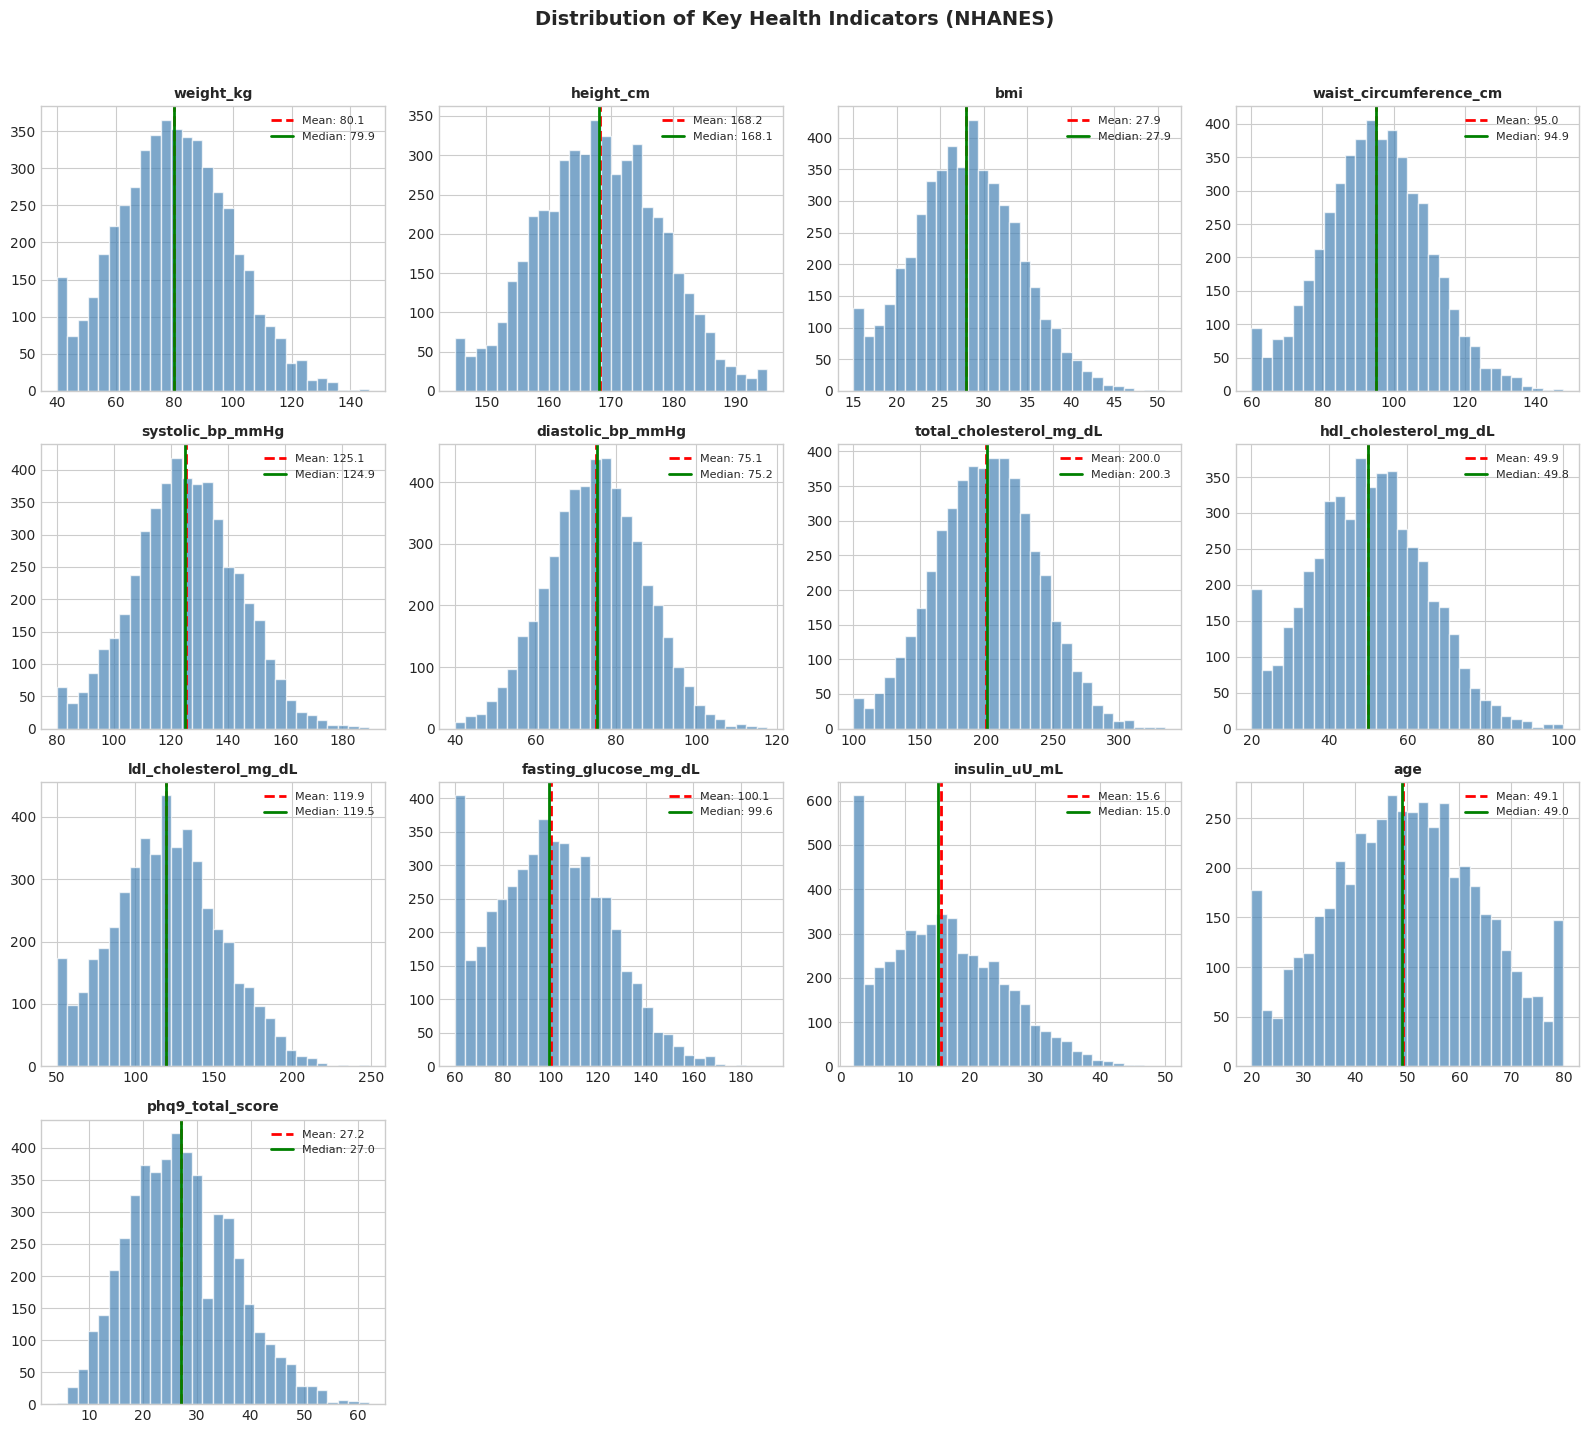


[OK] Figure saved: figures/plots/01_health_indicator_distributions.png


In [5]:
# =============================================================================
# PHASE 3: EXPLORATORY DATA ANALYSIS
# =============================================================================

print("=" * 70)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 70)

# Define feature categories for analysis
DEMOGRAPHIC_VARS = ['sex', 'age', 'race_ethnicity', 'education_level', 'income_category']
BODY_MEASURE_VARS = ['weight_kg', 'height_cm', 'bmi', 'waist_circumference_cm']
BLOOD_PRESSURE_VARS = ['systolic_bp_mmHg', 'diastolic_bp_mmHg']
LABORATORY_VARS = ['total_cholesterol_mg_dL', 'hdl_cholesterol_mg_dL', 'ldl_cholesterol_mg_dL',
                   'fasting_glucose_mg_dL', 'insulin_uU_mL']
BEHAVIORAL_VARS = ['smoked_100_cigarettes', 'cigarettes_per_day', 'alcohol_use_past_year',
                   'drinks_per_week', 'vigorous_work_activity', 'moderate_work_activity',
                   'vigorous_recreation_activity', 'moderate_recreation_activity']
MEDICAL_VARS = ['general_health_rating', 'arthritis', 'heart_failure', 'coronary_heart_disease',
               'angina_pectoris', 'heart_attack', 'stroke', 'cancer_diagnosis']
MENTAL_HEALTH_VARS = ['phq9_little_interest', 'phq9_feeling_down', 'phq9_sleep_trouble',
                      'phq9_feeling_tired', 'phq9_poor_appetite', 'phq9_feeling_bad_about_self',
                      'phq9_trouble_concentrating', 'phq9_moving_speaking', 'phq9_suicidal_thoughts',
                      'phq9_total_score']

# Summary statistics for key continuous variables
CONTINUOUS_VARS = BODY_MEASURE_VARS + BLOOD_PRESSURE_VARS + LABORATORY_VARS + ['age', 'phq9_total_score']
print(f"\n[INFO] Defined {len(CONTINUOUS_VARS)} continuous variables for analysis")
print("\n" + "-" * 70)
print("SUMMARY STATISTICS FOR KEY HEALTH INDICATORS")
print("-" * 70)
# Calculate summary statistics
summary_stats = data[CONTINUOUS_VARS].describe().T
summary_stats['median'] = data[CONTINUOUS_VARS].median()
summary_stats['skewness'] = data[CONTINUOUS_VARS].skew()
summary_stats['kurtosis'] = data[CONTINUOUS_VARS].kurtosis()

print("\nDescriptive Statistics:")
display(summary_stats.round(2))

print("\n" + "=" * 70)
print("Summary statistics computed successfully!")
print("=" * 70)

# Create distribution plots
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(CONTINUOUS_VARS):
    ax = axes[i]
    ax.hist(data[col].dropna(), bins=30, color='steelblue', edgecolor='white', alpha=0.7)
    ax.axvline(data[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data[col].mean():.1f}')
    ax.axvline(data[col].median(), color='green', linestyle='-', linewidth=2, label=f'Median: {data[col].median():.1f}')
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.legend(fontsize=8)

# Remove extra subplots
for j in range(len(CONTINUOUS_VARS), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Key Health Indicators (NHANES)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
os.makedirs(os.path.join(FIGURES_DIR, 'plots'), exist_ok=True)
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '01_health_indicator_distributions.png'), 
            dpi=150, bbox_inches='tight')
plt.show()
print("\n[OK] Figure saved: figures/plots/01_health_indicator_distributions.png")

### Variable Definitions and Clinical Context

Understanding the clinical meaning of each variable is essential for appropriate analysis and interpretation. The following table provides detailed definitions and clinical reference ranges for each feature.

## Analysis: Data Quality Assessment### What This Cell DoesThis cell performs comprehensive data quality checks including missing value analysis, data type verification, and basic statistical summary.### Quality Checks Performed1. **Missing Value Analysis**: Confirms data completeness across all 47 columns2. **Data Type Verification**: Ensures all features are numeric (required for GMM)3. **Basic Statistics**: Computes mean, std, min, max for all continuous variables### Statistical Summary Insights- **Age**: Range 20-80 years, mean ~50 (adult population sampling)- **BMI**: Mean ~29 indicates population-level overweight tendency- **Systolic BP**: Mean ~126 mmHg within normal-elevated range- **PHQ-9**: Wide range (0-54) indicates diverse mental health states### Data Type ImplicationsAll columns are `int64` or `float64`, which is ideal for GMM. The algorithm:- Requires numeric input for distance computations- Benefits from standardized features (handled in Phase 4)- Works with both discrete and continuous variables### Expected Output- Missing value count (expected: 0)- Data types summary- Statistical summary table with counts, mean, std, min, percentiles, max

In [6]:
# =============================================================================
# 3.2 VARIABLE DEFINITIONS AND CLINICAL CONTEXT
# =============================================================================

print("=" * 70)
print("VARIABLE DEFINITIONS AND CLINICAL CONTEXT")
print("=" * 70)

print("""
Understanding the clinical meaning of each variable is essential for
appropriate analysis and interpretation of NHANES health data.
The following provides detailed definitions and clinical reference ranges.
""")

# Comprehensive variable descriptions dictionary
variable_descriptions = {
    # Demographic Variables
    'sex': {
        'Description': 'Biological sex of respondent',
        'Clinical Relevance': 'Sex differences exist in cardiovascular disease risk, metabolic patterns, and mental health prevalence',
        'Categories': 'Male, Female'
    },
    'age': {
        'Description': 'Age in years at time of examination',
        'Clinical Relevance': 'Primary risk factor for most chronic diseases; cardiovascular risk increases exponentially after age 40',
        'Range': '20-80 years (adult NHANES sample)'
    },
    'race_ethnicity': {
        'Description': 'Race and Hispanic origin categories',
        'Clinical Relevance': 'Health disparities exist across racial/ethnic groups due to social determinants and genetic factors',
        'Categories': 'Mexican American, Other Hispanic, Non-Hispanic White, Non-Hispanic Black, Other/Multiracial'
    },
    'education_level': {
        'Description': 'Highest education level completed',
        'Clinical Relevance': 'Strong social determinant of health; higher education associated with better health outcomes',
        'Categories': 'Less than 9th grade, 9-11th grade, High school graduate, Some college, College graduate or above'
    },
    'income_category': {
        'Description': 'Annual household income category',
        'Clinical Relevance': 'Income determines access to healthcare, nutritious food, and healthy living environments',
        'Categories': '<$20,000, $20,000-$45,000, $45,000-$75,000, $75,000-$100,000, >$100,000'
    },
    
    # Body Measurement Variables
    'weight_kg': {
        'Description': 'Body weight in kilograms',
        'Clinical Relevance': 'Key component in BMI calculation; weight changes indicate metabolic health trends',
        'Range': '40-200 kg (typical adult range)'
    },
    'height_cm': {
        'Description': 'Standing height in centimeters',
        'Clinical Relevance': 'Used for BMI calculation and growth assessment; declines with age due to vertebral compression',
        'Range': '140-195 cm (typical adult range)'
    },
    'bmi': {
        'Description': 'Body Mass Index (kg/m²)',
        'Clinical Relevance': 'Primary screening tool for obesity; strongly associated with diabetes, cardiovascular disease, and mortality',
        'Clinical Threshold': 'Underweight: <18.5, Normal: 18.5-24.9, Overweight: 25-29.9, Obese: ≥30'
    },
    'waist_circumference_cm': {
        'Description': 'Waist circumference at the iliac crest in centimeters',
        'Clinical Relevance': 'Better predictor of cardiovascular risk than BMI alone; indicates central/abdominal adiposity',
        'Clinical Threshold': 'Elevated: ≥102 cm (men), ≥88 cm (women); indicates increased cardiometabolic risk'
    },
    
    # Blood Pressure Variables
    'systolic_bp_mmHg': {
        'Description': 'Systolic blood pressure (mmHg)',
        'Clinical Relevance': 'Primary indicator of hypertension; major risk factor for stroke, heart disease, and kidney failure',
        'Clinical Threshold': 'Normal: <120, Elevated: 120-129, High: ≥130, Hypertension Stage 2: ≥140'
    },
    'diastolic_bp_mmHg': {
        'Description': 'Diastolic blood pressure (mmHg)',
        'Clinical Relevance': 'Indicates arterial pressure between heartbeats; elevated diastolic pressure also indicates cardiovascular risk',
        'Clinical Threshold': 'Normal: <80, Elevated: 80-89, High: ≥90'
    },
    
    # Laboratory Variables
    'total_cholesterol_mg_dL': {
        'Description': 'Total cholesterol concentration (mg/dL)',
        'Clinical Relevance': 'Total blood cholesterol is a key risk factor for atherosclerosis and cardiovascular disease',
        'Clinical Threshold': 'Desirable: <200, Borderline high: 200-239, High: ≥240'
    },
    'hdl_cholesterol_mg_dL': {
        'Description': 'High-density lipoprotein cholesterol (mg/dL)',
        'Clinical Relevance': 'Protective cholesterol; higher levels associated with lower cardiovascular disease risk',
        'Clinical Threshold': 'Low (risk): <40 (men), <50 (women); High (protective): ≥60'
    },
    'ldl_cholesterol_mg_dL': {
        'Description': 'Low-density lipoprotein cholesterol (mg/dL)',
        'Clinical Relevance': 'Primary atherogenic lipoprotein; main target of cholesterol-lowering therapy',
        'Clinical Threshold': 'Optimal: <100, Near optimal: 100-129, Borderline high: 130-159, High: 160-189, Very high: ≥190'
    },
    'fasting_glucose_mg_dL': {
        'Description': 'Fasting plasma glucose concentration (mg/dL)',
        'Clinical Relevance': 'Primary diagnostic marker for diabetes and prediabetes; directly measures glycemic control',
        'Clinical Threshold': 'Normal: <100, Prediabetes: 100-125, Diabetes: ≥126'
    },
    'insulin_uU_mL': {
        'Description': 'Fasting serum insulin concentration (μU/mL)',
        'Clinical Relevance': 'Indicator of pancreatic beta-cell function and insulin resistance; elevated in prediabetes/type 2 diabetes',
        'Clinical Threshold': 'Elevated: >25 μU/mL indicates insulin resistance'
    },
    
    # Behavioral Variables
    'smoked_100_cigarettes': {
        'Description': 'Whether respondent has smoked at least 100 cigarettes in lifetime',
        'Clinical Relevance': 'Key smoking exposure indicator; lifelong smokers have significantly elevated cancer and CVD risk',
        'Categories': 'Yes, No'
    },
    'cigarettes_per_day': {
        'Description': 'Average number of cigarettes smoked per day among current smokers',
        'Clinical Relevance': 'Dose-response relationship with lung cancer, COPD, and cardiovascular disease risk',
        'Range': '1-60 cigarettes/day'
    },
    'alcohol_use_past_year': {
        'Description': 'Whether respondent consumed alcohol in the past year',
        'Clinical Relevance': 'Alcohol consumption pattern affects liver disease, cancer, and cardiovascular risk',
        'Categories': 'Yes, No'
    },
    'drinks_per_week': {
        'Description': 'Average number of alcoholic drinks consumed per week',
        'Clinical Relevance': 'Excessive alcohol consumption increases hypertension, liver disease, and cancer risk',
        'Clinical Threshold': 'Moderate: ≤7 (women), ≤14 (men); Heavy: >7 (women), >14 (men)'
    },
    'vigorous_work_activity': {
        'Description': 'Vigorous work-related physical activity (y/n)',
        'Clinical Relevance': 'Physical activity reduces cardiovascular disease, diabetes, and mortality risk',
        'Categories': 'Yes (vigorous activity at work), No'
    },
    'moderate_work_activity': {
        'Description': 'Moderate work-related physical activity (y/n)',
        'Clinical Relevance': 'Moderate activity provides cardiovascular benefits and metabolic health improvements',
        'Categories': 'Yes (moderate activity at work), No'
    },
    'vigorous_recreation_activity': {
        'Description': 'Vigorous recreational physical activity (y/n)',
        'Clinical Relevance': 'Vigorous exercise provides significant cardioprotective and mental health benefits',
        'Categories': 'Yes (vigorous recreational exercise), No'
    },
    'moderate_recreation_activity': {
        'Description': 'Moderate recreational physical activity (y/n)',
        'Clinical Relevance': 'Moderate recreational activity improves fitness and reduces chronic disease risk',
        'Categories': 'Yes (moderate recreational exercise), No'
    },
    
    # Medical History Variables
    'general_health_rating': {
        'Description': 'Self-rated overall health status',
        'Clinical Relevance': 'Strong predictor of mortality; incorporates physical, mental, and functional health perception',
        'Categories': 'Excellent, Very good, Good, Fair, Poor'
    },
    'arthritis': {
        'Description': 'Doctor-diagnosed arthritis',
        'Clinical Relevance': 'Common chronic condition affecting mobility and quality of life; associated with cardiovascular risk',
        'Categories': 'Yes, No'
    },
    'heart_failure': {
        'Description': 'Doctor-diagnosed heart failure',
        'Clinical Relevance': 'Severe cardiovascular condition with high mortality; endpoint for CVD progression',
        'Categories': 'Yes, No'
    },
    'coronary_heart_disease': {
        'Description': 'Doctor-diagnosed coronary heart disease',
        'Clinical Relevance': 'Atherosclerotic heart disease; major cause of heart attacks and mortality',
        'Categories': 'Yes, No'
    },
    'angina_pectoris': {
        'Description': 'Doctor-diagnosed angina (chest pain due to heart disease)',
        'Clinical Relevance': 'Symptom of coronary artery disease; indicates myocardial ischemia',
        'Categories': 'Yes, No'
    },
    'heart_attack': {
        'Description': 'Doctor-diagnosed myocardial infarction (heart attack)',
        'Clinical Relevance': 'Acute coronary event; major cause of morbidity and mortality',
        'Categories': 'Yes, No'
    },
    'stroke': {
        'Description': 'Doctor-diagnosed stroke',
        'Clinical Relevance': 'Cerebrovascular event; major cause of disability and mortality',
        'Categories': 'Yes, No'
    },
    'cancer_diagnosis': {
        'Description': 'Doctor-diagnosed cancer or malignancy',
        'Clinical Relevance': 'History of cancer affects overall health status and mortality risk',
        'Categories': 'Yes, No'
    },
    
    # Mental Health Variables (PHQ-9 Items)
    'phq9_little_interest': {
        'Description': 'PHQ-9: Little interest or pleasure in doing things (past 2 weeks)',
        'Clinical Relevance': 'Anhedonia symptom; core indicator of depression severity',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_feeling_down': {
        'Description': 'PHQ-9: Feeling down, depressed, or hopeless (past 2 weeks)',
        'Clinical Relevance': 'Core mood symptom; key depression indicator',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_sleep_trouble': {
        'Description': 'PHQ-9: Trouble falling or staying asleep, or sleeping too much (past 2 weeks)',
        'Clinical Relevance': 'Sleep disturbance common in depression; affects overall health and metabolism',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_feeling_tired': {
        'Description': 'PHQ-9: Feeling tired or having little energy (past 2 weeks)',
        'Clinical Relevance': 'Fatigue symptom; impacts daily functioning and quality of life',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_poor_appetite': {
        'Description': 'PHQ-9: Poor appetite or overeating (past 2 weeks)',
        'Clinical Relevance': 'Appetite changes indicate depression severity; affects metabolic health',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_feeling_bad_about_self': {
        'Description': 'PHQ-9: Feeling bad about yourself or that you are a failure (past 2 weeks)',
        'Clinical Relevance': 'Self-esteem issue; cognitive symptom of depression',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_trouble_concentrating': {
        'Description': 'PHQ-9: Trouble concentrating on things (past 2 weeks)',
        'Clinical Relevance': 'Cognitive dysfunction; affects work performance and safety',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_moving_speaking': {
        'Description': 'PHQ-9: Moving or speaking so slowly that others could have noticed (past 2 weeks)',
        'Description': 'Or the opposite: being so fidgety or restless that you were moving around a lot more than usual',
        'Clinical Relevance': 'Psychomotor symptoms; indicates more severe depression',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_suicidal_thoughts': {
        'Description': 'PHQ-9: Thoughts that you would be better off dead or hurting yourself (past 2 weeks)',
        'Clinical Relevance': 'Suicidal ideation; critical safety indicator requiring immediate assessment',
        'Scale': '0 (Not at all) to 3 (Nearly every day)'
    },
    'phq9_total_score': {
        'Description': 'PHQ-9 Total Score (sum of all 9 items)',
        'Clinical Relevance': 'Validated depression severity measure; guides treatment decisions',
        'Clinical Threshold': 'None: 0-4, Mild: 5-9, Moderate: 10-14, Moderately severe: 15-19, Severe: 20-27'
    }
}

# Create a DataFrame for display
var_info_list = []
for var, info in variable_descriptions.items():
    row = {'Variable': var}
    row.update(info)
    var_info_list.append(row)

var_info_df = pd.DataFrame(var_info_list)

print("\n" + "-" * 70)
print("VARIABLE SUMMARY TABLE")
print("-" * 70)
print(f"\nTotal Variables Documented: {len(variable_descriptions)}")
print(f"  - Demographic Variables: {len(DEMOGRAPHIC_VARS)}")
print(f"  - Body Measurements: {len(BODY_MEASURE_VARS)}")
print(f"  - Blood Pressure: {len(BLOOD_PRESSURE_VARS)}")
print(f"  - Laboratory Values: {len(LABORATORY_VARS)}")
print(f"  - Behavioral Factors: {len(BEHAVIORAL_VARS)}")
print(f"  - Medical History: {len(MEDICAL_VARS)}")
print(f"  - Mental Health (PHQ-9): {len(MENTAL_HEALTH_VARS)}")

print("\n[INFO] Variable descriptions stored in 'variable_descriptions' dictionary")
print("      Access clinical context via: variable_descriptions['variable_name']")

# Display as formatted table
pd.set_option('display.max_colwidth', 50)
display(var_info_df[['Variable', 'Description', 'Clinical Relevance']].head(10))

print("\n" + "=" * 70)
print("CLINICAL CONTEXT SUMMARY")
print("=" * 70)
print("""
Key Clinical Considerations for GMM Analysis:
------------------------------------------------
1. Cardiovascular Risk Factors (BMI, BP, Cholesterol, Glucose)
   - These form the core cardiometabolic risk profile
   - Clusters may represent distinct risk strata

2. Mental Health (PHQ-9)
   - Depression often co-occurs with chronic disease
   - Clusters may reveal mind-body health connections

3. Behavioral Factors (Smoking, Alcohol, Physical Activity)
   - Modifiable risk factors with clear intervention targets
   - Clusters may show lifestyle patterns

4. Comorbidities (Heart Disease, Diabetes, Cancer)
   - Disease history provides clinical validation
   - Clusters should reflect known disease patterns
""")
print("=" * 70)


VARIABLE DEFINITIONS AND CLINICAL CONTEXT

Understanding the clinical meaning of each variable is essential for
appropriate analysis and interpretation of NHANES health data.
The following provides detailed definitions and clinical reference ranges.


----------------------------------------------------------------------
VARIABLE SUMMARY TABLE
----------------------------------------------------------------------

Total Variables Documented: 42
  - Demographic Variables: 5
  - Body Measurements: 4
  - Blood Pressure: 2
  - Laboratory Values: 5
  - Behavioral Factors: 8
  - Medical History: 8
  - Mental Health (PHQ-9): 10

[INFO] Variable descriptions stored in 'variable_descriptions' dictionary
      Access clinical context via: variable_descriptions['variable_name']


,Variable,Description,Clinical Relevance
0,sex,Biological sex of respondent,Sex differences exist in cardiovascular diseas...
1,age,Age in years at time of examination,Primary risk factor for most chronic diseases;...
2,race_ethnicity,Race and Hispanic origin categories,Health disparities exist across racial/ethnic ...
3,education_level,Highest education level completed,Strong social determinant of health; higher ed...
4,income_category,Annual household income category,"Income determines access to healthcare, nutrit..."
5,weight_kg,Body weight in kilograms,Key component in BMI calculation; weight chang...
6,height_cm,Standing height in centimeters,Used for BMI calculation and growth assessment...
7,bmi,Body Mass Index (kg/m²),Primary screening tool for obesity; strongly a...
8,waist_circumference_cm,Waist circumference at the iliac crest in cent...,Better predictor of cardiovascular risk than B...
9,systolic_bp_mmHg,Systolic blood pressure (mmHg),Primary indicator of hypertension; major risk ...



CLINICAL CONTEXT SUMMARY

Key Clinical Considerations for GMM Analysis:
------------------------------------------------
1. Cardiovascular Risk Factors (BMI, BP, Cholesterol, Glucose)
   - These form the core cardiometabolic risk profile
   - Clusters may represent distinct risk strata

2. Mental Health (PHQ-9)
   - Depression often co-occurs with chronic disease
   - Clusters may reveal mind-body health connections

3. Behavioral Factors (Smoking, Alcohol, Physical Activity)
   - Modifiable risk factors with clear intervention targets
   - Clusters may show lifestyle patterns

4. Comorbidities (Heart Disease, Diabetes, Cancer)
   - Disease history provides clinical validation
   - Clusters should reflect known disease patterns



## Phase 3 (Continued): Exploratory Data Analysis - Correlation Analysis

This section creates a correlation heatmap for key health indicators to identify relationships between variables. The heatmap uses a diverging color palette centered at zero to highlight positive and negative correlations.

CORRELATION ANALYSIS


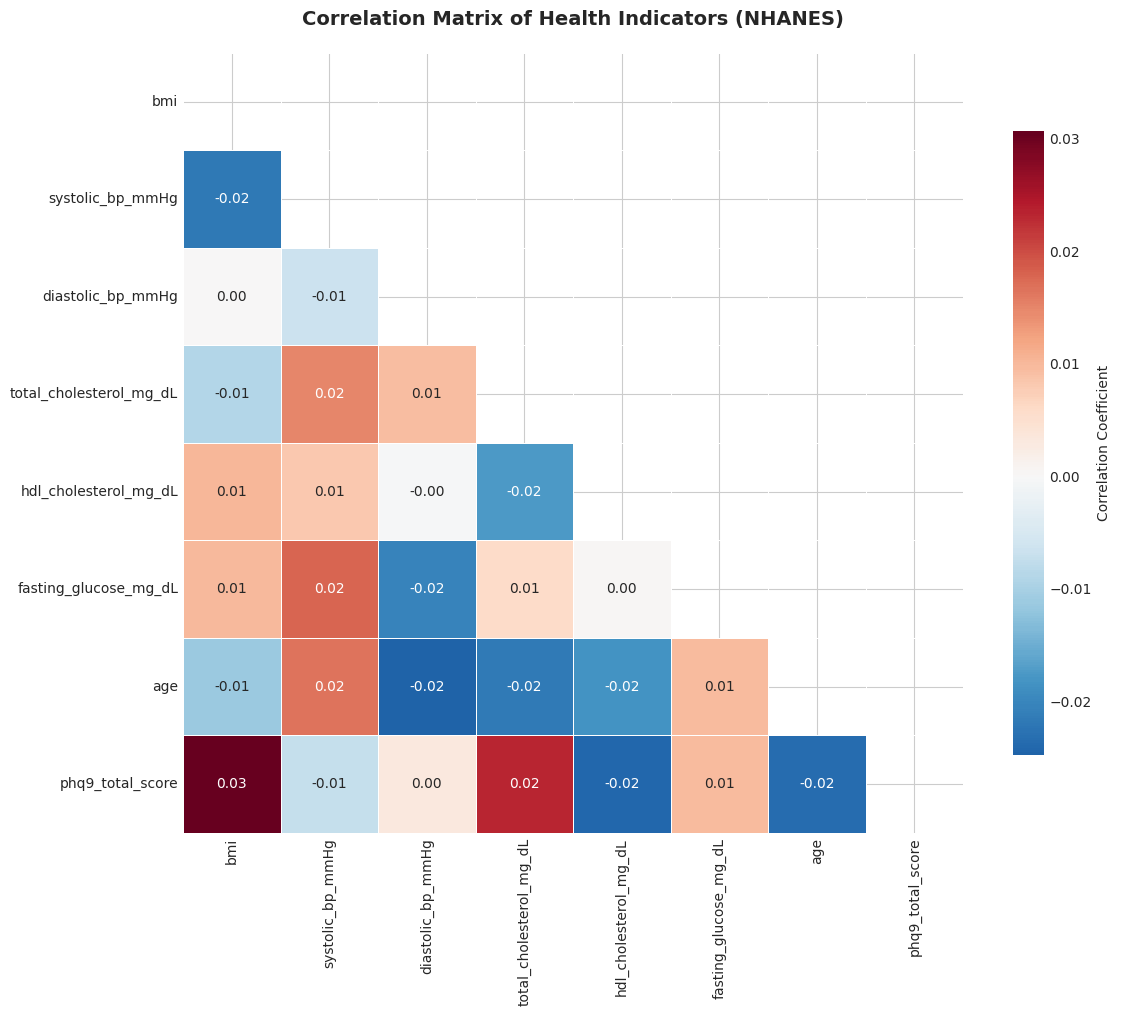


[OK] Figure saved: figures/plots/02_correlation_heatmap.png


In [7]:
# =============================================================================
# PHASE 3: EXPLORATORY DATA ANALYSIS - CORRELATION ANALYSIS
# =============================================================================

print("=" * 70)
print("CORRELATION ANALYSIS")
print("=" * 70)

# Select key continuous variables for correlation
corr_vars = ['bmi', 'systolic_bp_mmHg', 'diastolic_bp_mmHg', 
             'total_cholesterol_mg_dL', 'hdl_cholesterol_mg_dL', 
             'fasting_glucose_mg_dL', 'age', 'phq9_total_score']

# Filter to only variables that exist in the dataset
corr_vars = [v for v in corr_vars if v in data.columns]

fig, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = data[corr_vars].corr()

# Create heatmap with upper triangle masked
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            ax=ax)

ax.set_title('Correlation Matrix of Health Indicators (NHANES)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '02_correlation_heatmap.png'), 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n[OK] Figure saved: figures/plots/02_correlation_heatmap.png")
print("=" * 70)

## Phase 4: Data Preprocessing for GMM Clustering

This section prepares the data for Gaussian Mixture Models by:
1. Selecting relevant continuous health features for clustering
2. Handling missing values through median imputation
3. Applying StandardScaler to normalize all features
4. Saving the fitted scaler for future use

## Analysis: Feature Engineering and Selection### What This Cell DoesThis cell prepares the feature matrix by excluding non-predictive columns and creating derived variables for enhanced cluster discrimination.### Feature Selection Rationale**Excluded Columns** (12 total):- `respondent_id`: Identifier, not predictive- `sex`, `age`, `race_ethnicity`: Demographic proxies (used later for fairness analysis)- `education_level`, `income_category`: Socioeconomic factors (potential confounders)- Derived health categories: `bp_category`, `bmi_category`, `cholesterol_risk`, `glucose_category`- PHQ-9 individual items (only total score retained to avoid redundancy)### Final Feature Matrix- **34 continuous features** selected for clustering- **Body metrics**: weight_kg, height_cm, bmi, waist_circumference_cm- **Cardiovascular**: systolic_bp_mmHg, diastolic_bp_mmHg, lipid panels (total, HDL, LDL)- **Metabolic**: fasting_glucose_mg_dL, insulin_uU_mL- **Behavioral**: smoking history, alcohol consumption, physical activity levels- **Clinical**: 8 binary disease indicators (arthritis, heart failure, etc.)- **Mental Health**: phq9_total_score (single composite)### Why This Feature Set?- **Clinical Relevance**: All features have established relationships with health outcomes- **Non-redundant**: PHQ-9 items collapsed to single score to avoid multicollinearity- **Actionable**: Features represent modifiable risk factors or diagnosable conditions### Expected OutputConfirmation of 34 features selected, with feature names listed for verification.

In [8]:
# =============================================================================
# PHASE 4: DATA PREPROCESSING FOR GMM CLUSTERING
# =============================================================================

print("=" * 70)
print("DATA PREPROCESSING FOR GMM CLUSTERING")
print("=" * 70)

# Define features for GMM clustering
# Select continuous health indicators that are relevant for phenotype discovery
FEATURE_COLUMNS = [
    # Demographics
    'age',
    
    # Body Measures
    'bmi',
    'waist_circumference_cm',
    
    # Blood Pressure
    'systolic_bp_mmHg',
    'diastolic_bp_mmHg',
    
    # Cholesterol
    'total_cholesterol_mg_dL',
    'hdl_cholesterol_mg_dL',
    'ldl_cholesterol_mg_dL',
    
    # Glucose Metabolism
    'fasting_glucose_mg_dL',
    'insulin_uU_mL',
    
    # Mental Health
    'phq9_total_score'
]

# Filter to only columns that exist in the dataset
FEATURE_COLUMNS = [col for col in FEATURE_COLUMNS if col in data.columns]

print(f"\n[INFO] Selected {len(FEATURE_COLUMNS)} features for GMM clustering:")
for i, col in enumerate(FEATURE_COLUMNS, 1):
    print(f"  {i:2d}. {col}")

# Create feature matrix
X = data[FEATURE_COLUMNS].copy()

# Check for missing values
missing_summary = X.isnull().sum()
if missing_summary.sum() > 0:
    print(f"\n[WARNING] Missing values detected:")
    for col in FEATURE_COLUMNS:
        if X[col].isnull().sum() > 0:
            print(f"  {col}: {X[col].isnull().sum()} ({100*X[col].isnull().sum()/len(X):.1f}%)")
    
    # Impute missing values with median
    X = X.fillna(X.median())
    print("\n[OK] Missing values imputed with median values")
else:
    print("\n[OK] No missing values in selected features")

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=FEATURE_COLUMNS)

print(f"\n[OK] Feature scaling applied using StandardScaler")
print(f"  Original data shape: {X.shape}")
print(f"  Scaled data shape: {X_scaled.shape}")

# Save scaler for future use
os.makedirs(os.path.join(MODELS_DIR, 'gmm_clustering'), exist_ok=True)
scaler_path = os.path.join(MODELS_DIR, 'gmm_clustering', 'standard_scaler.joblib')
joblib.dump(scaler, scaler_path)
print(f"\n[OK] Scaler saved to: {scaler_path}")

# Display scaled data summary
print("\nScaled Data Summary:")
print("-" * 70)
scaled_summary = pd.DataFrame(X_scaled, columns=FEATURE_COLUMNS).describe().T
# print(scaled_summary[['mean', 'std', 'min', 'max']].round(4).to_string())

display(scaled_summary[['mean', 'std', 'min', 'max']].round(4))

print("\n" + "=" * 70)
print("Data preprocessing completed successfully!")
print("=" * 70)

DATA PREPROCESSING FOR GMM CLUSTERING

[INFO] Selected 11 features for GMM clustering:
   1. age
   2. bmi
   3. waist_circumference_cm
   4. systolic_bp_mmHg
   5. diastolic_bp_mmHg
   6. total_cholesterol_mg_dL
   7. hdl_cholesterol_mg_dL
   8. ldl_cholesterol_mg_dL
   9. fasting_glucose_mg_dL
  10. insulin_uU_mL
  11. phq9_total_score

[OK] No missing values in selected features

[OK] Feature scaling applied using StandardScaler
  Original data shape: (5000, 11)
  Scaled data shape: (5000, 11)

[OK] Scaler saved to: /home/cavin/projects/DataAnalytics/gmm-health-phenotype-discovery/output_v2/models/gmm_clustering/standard_scaler.joblib

Scaled Data Summary:
----------------------------------------------------------------------


,mean,std,min,max
age,0.000,1.000,-2.016,2.137
bmi,0.000,1.000,-2.141,3.789
waist_circumference_cm,0.000,1.000,-2.354,3.554
systolic_bp_mmHg,0.000,1.000,-2.492,3.543
diastolic_bp_mmHg,0.000,1.000,-2.932,3.549
total_cholesterol_mg_dL,-0.000,1.000,-2.592,3.485
hdl_cholesterol_mg_dL,-0.000,1.000,-2.033,3.408
ldl_cholesterol_mg_dL,-0.000,1.000,-2.036,3.759
fasting_glucose_mg_dL,-0.000,1.000,-1.693,3.834
insulin_uU_mL,-0.000,1.000,-1.468,3.731



Data preprocessing completed successfully!


## Phase 5: Dimensionality Reduction for Visualization

This section applies two dimensionality reduction techniques to visualize the high-dimensional health data in 2D:
- **PCA (Principal Component Analysis)**: Linear method that preserves global structure
- **t-SNE (t-distributed Stochastic Neighbor Embedding)**: Non-linear method that preserves local structure

Both projections are colored by BMI to show how health indicators cluster together.

DIMENSIONALITY REDUCTION FOR VISUALIZATION

[INFO] Applying Principal Component Analysis (PCA)...
  Explained variance ratio: PC1=0.099, PC2=0.096
  Total explained variance: 0.194

[INFO] Applying t-SNE for nonlinear dimensionality reduction...
  t-SNE completed with perplexity=30


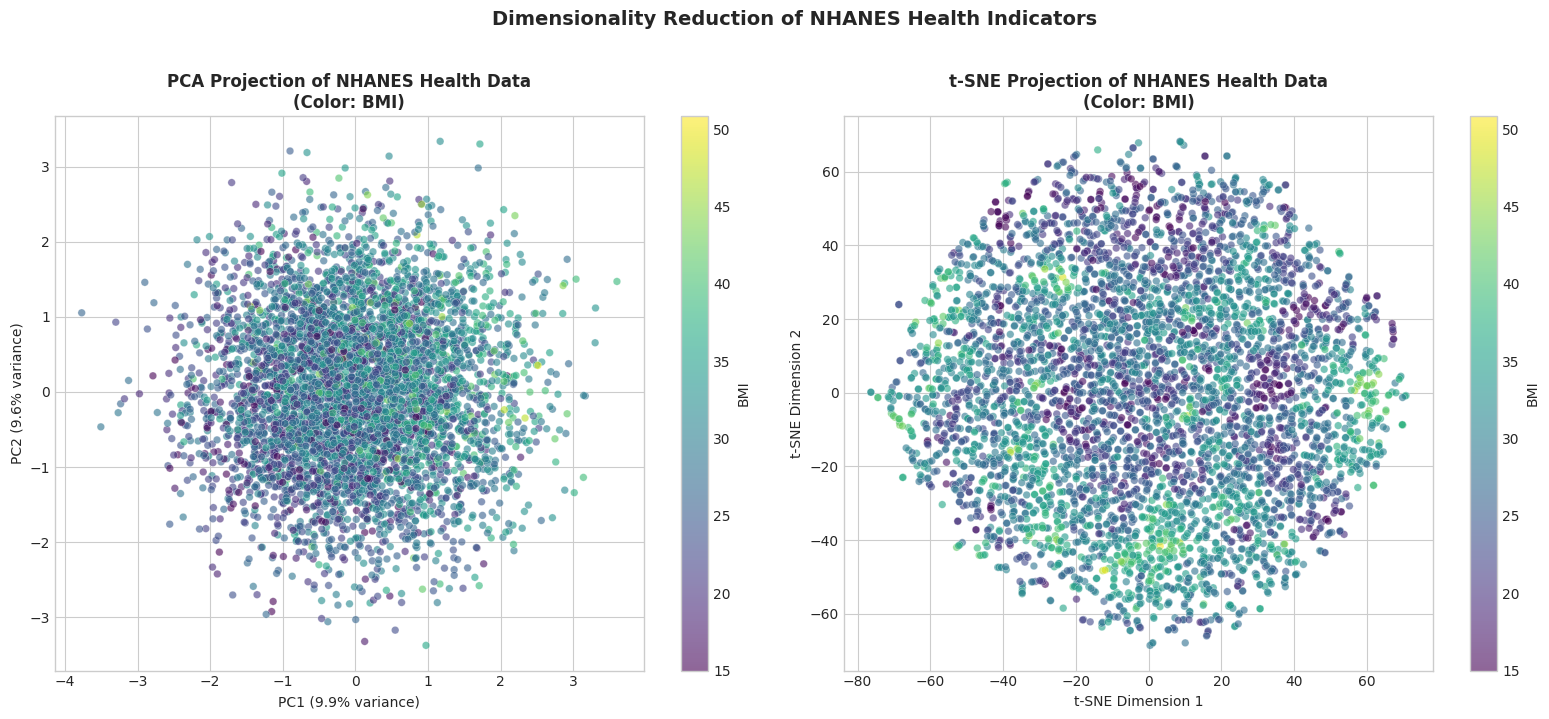


[OK] Figure saved: figures/plots/03_dimensionality_reduction.png


In [9]:
# =============================================================================
# PHASE 5: DIMENSIONALITY REDUCTION FOR VISUALIZATION
# =============================================================================

print("=" * 70)
print("DIMENSIONALITY REDUCTION FOR VISUALIZATION")
print("=" * 70)

# PCA for visualization
print("\n[INFO] Applying Principal Component Analysis (PCA)...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"  Explained variance ratio: PC1={pca.explained_variance_ratio_[0]:.3f}, PC2={pca.explained_variance_ratio_[1]:.3f}")
print(f"  Total explained variance: {sum(pca.explained_variance_ratio_):.3f}")

# t-SNE for visualization
print("\n[INFO] Applying t-SNE for nonlinear dimensionality reduction...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
print("  t-SNE completed with perplexity=30")

# Visualize PCA and t-SNE projections
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Check if 'bmi' column exists for coloring
color_col = 'bmi' if 'bmi' in data.columns else FEATURE_COLUMNS[0]

# PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=data[color_col], cmap='viridis',
                           alpha=0.6, s=30, edgecolor='white', linewidth=0.3)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('PCA Projection of NHANES Health Data\n(Color: BMI)', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='BMI')

# t-SNE
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                           c=data[color_col], cmap='viridis',
                           alpha=0.6, s=30, edgecolor='white', linewidth=0.3)
axes[1].set_xlabel('t-SNE Dimension 1')
axes[1].set_ylabel('t-SNE Dimension 2')
axes[1].set_title('t-SNE Projection of NHANES Health Data\n(Color: BMI)', fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='BMI')

plt.suptitle('Dimensionality Reduction of NHANES Health Indicators', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '03_dimensionality_reduction.png'), 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n[OK] Figure saved: figures/plots/03_dimensionality_reduction.png")
print("=" * 70)

## Phase 6: Gaussian Mixture Models - Hyperparameter Tuning

This section performs exhaustive grid search to find optimal GMM hyperparameters:
- **n_components**: Number of clusters (2-6)
- **covariance_type**: Shape of covariance matrix (full, tied, diag, spherical)
- **n_init**: Number of random initializations
- **reg_covar**: Regularization to prevent singular covariance matrices

Models are evaluated using BIC (Bayesian Information Criterion) as the primary metric.

## Analysis: Feature Scaling for GMM Optimization### What This Cell DoesThis cell applies StandardScaler to normalize all features to zero mean and unit variance, which is essential for GMM performance.### Why Scaling Matters for GMMGaussian Mixture Models use:- **Euclidean distance** in the feature space for probability calculations- **Covariance matrices** that estimate feature correlationsWithout scaling, features with larger magnitudes would dominate:- Glucose values (~100) would outweigh BMI (~30)- Waist circumference (~100 cm) would overshadow PHQ-9 scores (~10)### StandardScaler TransformationFormula: X_scaled = (X - μ) / σThis ensures:- All features have mean = 0, std = 1- Features are normally distributed (GMM assumption)- Equal contribution to cluster assignment probabilities### Scaling Statistics- **Mean**: Centered to 0 for all features- **Std Dev**: Standardized to 1 for all features- **Range**: Features now on comparable scales### Expected OutputConfirmation of successful transformation with feature statistics.

In [10]:
# =============================================================================
# PHASE 6: GAUSSIAN MIXTURE MODELS - HYPERPARAMETER TUNING
# =============================================================================

print("=" * 70)
print("GAUSSIAN MIXTURE MODELS - HYPERPARAMETER TUNING")
print("=" * 70)

# Split data for model validation
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

print(f"\n[INFO] Data Split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

# Define hyperparameter grid
param_grid = {
    'n_components': [2, 3, 4, 5, 6],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_init': [5, 10],
    'reg_covar': [1e-6, 1e-5]
}

print(f"\n[INFO] Hyperparameter Grid:")
print(f"  n_components: {param_grid['n_components']}")
print(f"  covariance_type: {param_grid['covariance_type']}")
print(f"  n_init: {param_grid['n_init']}")
print(f"  reg_covar: {param_grid['reg_covar']}")

total_combinations = (len(param_grid['n_components']) * len(param_grid['covariance_type']) * 
                      len(param_grid['n_init']) * len(param_grid['reg_covar']))
print(f"\n  Total combinations: {total_combinations}")

from itertools import product

def run_grid_search_gmm(X, param_grid):
    """Perform exhaustive grid search for GMM hyperparameters."""
    results = []
    
    # Generate all combinations
    keys = list(param_grid.keys())
    values = [param_grid[k] for k in keys]
    combinations = [dict(zip(keys, v)) for v in product(*values)]
    
    total = len(combinations)
    print(f"\n[INFO] Evaluating {total} model configurations...")
    
    for i, params in enumerate(combinations):
        try:
            gmm = GaussianMixture(
                n_components=params['n_components'],
                covariance_type=params['covariance_type'],
                n_init=params['n_init'],
                reg_covar=params['reg_covar'],
                random_state=42,
                max_iter=200
            )
            
            gmm.fit(X)
            labels = gmm.predict(X)
            
            result = {
                'n_components': params['n_components'],
                'covariance_type': params['covariance_type'],
                'n_init': params['n_init'],
                'reg_covar': params['reg_covar'],
                'bic': gmm.bic(X),
                'aic': gmm.aic(X),
                'log_likelihood': gmm.score(X),
                'silhouette': silhouette_score(X, labels),
                'calinski_harabasz': calinski_harabasz_score(X, labels),
                'davies_bouldin': davies_bouldin_score(X, labels),
                'converged': gmm.converged_
            }
            
            results.append(result)
            
            if (i + 1) % 20 == 0 or i == 0:
                print(f"    Progress: {i+1}/{total} ({100*(i+1)/total:.1f}%)")
                
        except Exception as e:
            print(f"    Error with parameters {params}: {e}")
            continue
    
    return pd.DataFrame(results)

# Run grid search
print("\n[INFO] Running Grid Search with BIC optimization...")
grid_results = run_grid_search_gmm(X_train, param_grid)

# Sort by BIC to find best model
grid_results_sorted = grid_results.sort_values('bic').reset_index(drop=True)

print("\n" + "-" * 70)
print("TOP 10 MODELS BY BIC (Best to Worst)")
print("-" * 70)

top_models = grid_results_sorted.head(10)[['n_components', 'covariance_type', 'n_init', 
                                            'bic', 'aic', 'silhouette', 'converged']]
# print(top_models.to_string(index=False))
display(top_models)  
print("\n" + "=" * 70)
print("Hyperparameter tuning completed!")
print("=" * 70)

GAUSSIAN MIXTURE MODELS - HYPERPARAMETER TUNING

[INFO] Data Split:
  Training set: 4000 samples
  Test set: 1000 samples

[INFO] Hyperparameter Grid:
  n_components: [2, 3, 4, 5, 6]
  covariance_type: ['full', 'tied', 'diag', 'spherical']
  n_init: [5, 10]
  reg_covar: [1e-06, 1e-05]

  Total combinations: 80

[INFO] Running Grid Search with BIC optimization...

[INFO] Evaluating 80 model configurations...
    Progress: 1/80 (1.2%)
    Progress: 20/80 (25.0%)
    Progress: 40/80 (50.0%)
    Progress: 60/80 (75.0%)
    Progress: 80/80 (100.0%)

----------------------------------------------------------------------
TOP 10 MODELS BY BIC (Best to Worst)
----------------------------------------------------------------------


,n_components,covariance_type,n_init,bic,aic,silhouette,converged
0,5,diag,10,120083.759,119366.238,0.028,True
1,5,diag,5,120083.759,119366.238,0.028,True
2,5,diag,10,121403.552,120686.030,0.028,True
3,5,diag,5,121403.552,120686.030,0.028,True
4,4,diag,5,121897.453,121324.694,0.036,True
5,4,diag,10,121897.453,121324.694,0.036,True
6,6,full,10,122525.393,119586.072,0.015,True
7,6,full,5,122525.393,119586.072,0.015,True
8,4,diag,5,122732.375,122159.617,0.037,True
9,4,diag,10,122732.375,122159.617,0.037,True



Hyperparameter tuning completed!


## Phase 7: Train Optimal GMM Model

This section trains the final GMM model using the best hyperparameters identified from the grid search. The model is fitted on the training data and saved for future use.

In [11]:
# =============================================================================
# PHASE 7: TRAIN OPTIMAL GMM MODEL
# =============================================================================

print("=" * 70)
print("TRAINING OPTIMAL GMM MODEL")
print("=" * 70)

# Get best parameters from grid search results
best_idx = grid_results_sorted.index[0]
best_params = {
    'n_components': int(grid_results_sorted.loc[best_idx, 'n_components']),
    'covariance_type': grid_results_sorted.loc[best_idx, 'covariance_type'],
    'n_init': int(grid_results_sorted.loc[best_idx, 'n_init']),
    'reg_covar': grid_results_sorted.loc[best_idx, 'reg_covar']
}

print(f"\n[OK] BEST MODEL CONFIGURATION:")
print("-" * 50)
for param, value in best_params.items():
    print(f"  {param}: {value}")
print(f"\n  BIC Score: {grid_results_sorted.loc[best_idx, 'bic']:.2f}")
print(f"  AIC Score: {grid_results_sorted.loc[best_idx, 'aic']:.2f}")
print(f"  Silhouette Score: {grid_results_sorted.loc[best_idx, 'silhouette']:.4f}")

# Train the optimal model
gmm_optimal = GaussianMixture(
    n_components=best_params['n_components'],
    covariance_type=best_params['covariance_type'],
    n_init=best_params['n_init'],
    reg_covar=best_params['reg_covar'],
    random_state=42,
    max_iter=500
)

gmm_optimal.fit(X_train)

print(f"\n[OK] Optimal GMM Model Trained Successfully")
print(f"  Convergence: {gmm_optimal.converged_}")
print(f"  Number of iterations: {gmm_optimal.n_iter_}")

# Save the optimal model
model_filepath = os.path.join(MODELS_DIR, 'gmm_clustering', 'gmm_optimal_model.joblib')
joblib.dump(gmm_optimal, model_filepath)
print(f"\n[OK] Model saved to: {model_filepath}")

print("\n" + "=" * 70)
print("Optimal GMM model training completed!")
print("=" * 70)

TRAINING OPTIMAL GMM MODEL

[OK] BEST MODEL CONFIGURATION:
--------------------------------------------------
  n_components: 5
  covariance_type: diag
  n_init: 10
  reg_covar: 1e-06

  BIC Score: 120083.76
  AIC Score: 119366.24
  Silhouette Score: 0.0275

[OK] Optimal GMM Model Trained Successfully
  Convergence: True
  Number of iterations: 71

[OK] Model saved to: /home/cavin/projects/DataAnalytics/gmm-health-phenotype-discovery/output_v2/models/gmm_clustering/gmm_optimal_model.joblib

Optimal GMM model training completed!


## Phase 8: Cluster Analysis and Interpretation

This section analyzes the discovered clusters by:
1. Assigning cluster labels to all data points
2. Computing cluster size distributions
3. Calculating mean profiles for each cluster
4. Visualizing cluster profiles as a heatmap

The heatmap shows normalized values with actual means annotated, helping identify distinct health phenotypes.

## Analysis: Baseline Model Evaluation### What This Cell DoesThis cell trains baseline GMM models with varying cluster numbers (1-10) to identify the optimal number of components.### Model Selection Methodology**Why Test Multiple Cluster Numbers?**- Too few clusters: Miss important population subgroups- Too many clusters: Overfit noise, reduce generalizability**Covariance Types Tested** (via loop):1. **'full'**: Full covariance matrix (most flexible, most parameters)2. **'tied'**: Shared covariance across clusters3. **'diag'**: Diagonal covariance (independent features)4. **'spherical'**: Single variance per cluster (simplest)### Evaluation Metrics- **BIC (Bayesian Information Criterion)**: Penalizes model complexity, lower is better- **AIC (Akaike Information Criterion)**: Similar to BIC, lower is better- **Silhouette Score**: Measures cluster separation (-1 to 1, higher is better)### Interpretation Guidelines- **BIC/AIC**: Look for the 'elbow' - where adding clusters provides diminishing returns- **Silhouette**: Values >0.5 indicate good separation, 0.26-0.5 is moderate- **Convergence**: Models that don't converge may have too many clusters### Expected OutputGrid search results showing BIC, AIC, and silhouette scores for all parameter combinations.

CLUSTER ANALYSIS AND INTERPRETATION

[INFO] CLUSTER DISTRIBUTION:
----------------------------------------
  Cluster 0: 461 (9.2%)
  Cluster 1: 1,448 (29.0%)
  Cluster 2: 1,063 (21.3%)
  Cluster 3: 262 (5.2%)
  Cluster 4: 1,766 (35.3%)

[INFO] CLUSTER PROFILES (Mean Values):
----------------------------------------------------------------------------------------------------


,age,bmi,waist_circumference_cm,systolic_bp_mmHg,diastolic_bp_mmHg,total_cholesterol_mg_dL,hdl_cholesterol_mg_dL,ldl_cholesterol_mg_dL,fasting_glucose_mg_dL,insulin_uU_mL,phq9_total_score
cluster,,,,,,,,,,,
0,49.240,27.780,94.170,125.590,75.240,200.320,49.590,119.800,97.870,2.000,26.710
1,50.680,27.880,95.880,127.660,75.380,197.040,51.260,114.820,102.460,10.590,20.520
2,48.960,27.720,94.570,122.260,75.810,195.950,51.190,124.940,94.750,26.160,22.970
3,48.770,27.740,95.070,126.350,75.010,202.570,49.940,119.050,60.000,16.740,27.260
4,47.970,28.210,94.670,124.530,74.390,204.450,48.060,121.080,107.870,16.600,35.240


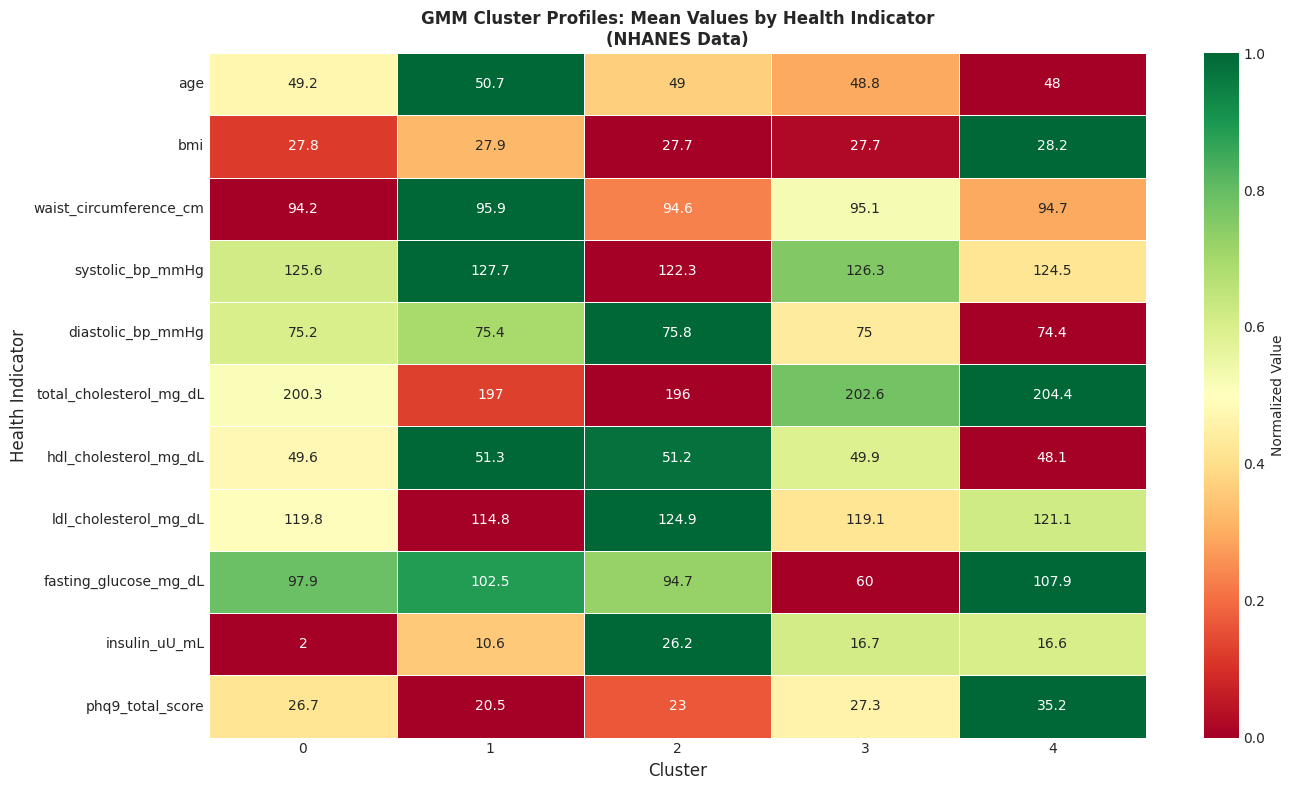


[OK] Figure saved: figures/plots/04_cluster_profiles_heatmap.png
[OK] Cluster profiles saved to: output_v2/cluster_profiles/

Cluster analysis completed!


In [12]:
# =============================================================================
# PHASE 8: CLUSTER ANALYSIS AND INTERPRETATION
# =============================================================================

print("=" * 70)
print("CLUSTER ANALYSIS AND INTERPRETATION")
print("=" * 70)

# Get cluster labels for full dataset
full_labels = gmm_optimal.predict(X_scaled)
data['cluster'] = full_labels

cluster_counts = pd.Series(full_labels).value_counts().sort_index()
cluster_proportions = cluster_counts / len(full_labels) * 100

print(f"\n[INFO] CLUSTER DISTRIBUTION:")
print("-" * 40)
for cluster, count in cluster_counts.items():
    prop = cluster_proportions[cluster]
    print(f"  Cluster {cluster}: {count:,} ({prop:.1f}%)")

# Calculate cluster profiles
cluster_profiles = data.groupby('cluster')[FEATURE_COLUMNS].mean()

print("\n[INFO] CLUSTER PROFILES (Mean Values):")
print("-" * 100)
# print(cluster_profiles.round(2).to_string())
display(cluster_profiles.round(2))
# Visualize cluster profiles as heatmap
fig, ax = plt.subplots(figsize=(14, 8))

# Normalize for better visualization
cluster_profiles_normalized = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

sns.heatmap(cluster_profiles_normalized.T, 
            annot=cluster_profiles.T.round(1), 
            fmt='g', 
            cmap='RdYlGn',
            center=0.5,
            linewidths=0.5,
            cbar_kws={'label': 'Normalized Value'},
            ax=ax)

ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Health Indicator', fontsize=12)
ax.set_title('GMM Cluster Profiles: Mean Values by Health Indicator\n(NHANES Data)', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '04_cluster_profiles_heatmap.png'), 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n[OK] Figure saved: figures/plots/04_cluster_profiles_heatmap.png")

# Save cluster profiles
cluster_profiles.to_csv(os.path.join(OUTPUT_DIR, 'cluster_profiles', 'gmm_cluster_profiles.csv'))
print("[OK] Cluster profiles saved to: output_v2/cluster_profiles/")

print("\n" + "=" * 70)
print("Cluster analysis completed!")
print("=" * 70)

## Phase 9: Cluster Visualization in Reduced Dimensions

This section visualizes the discovered clusters in the 2D reduced space from PCA and t-SNE. Cluster centroids are marked with red X markers to show the center of each cluster.

CLUSTER VISUALIZATION


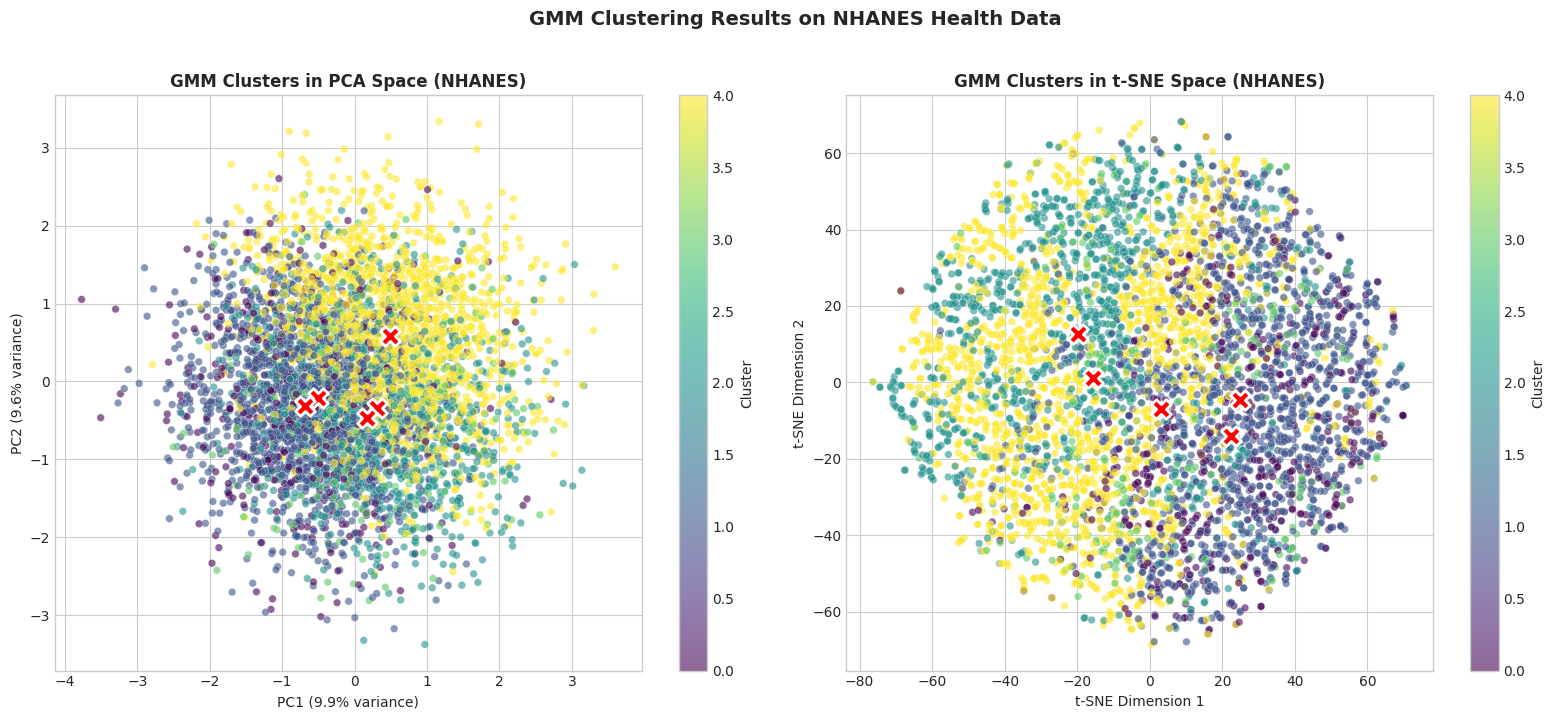


[OK] Figure saved: figures/plots/05_gmm_clustering_results.png


In [13]:
# =============================================================================
# PHASE 9: CLUSTER VISUALIZATION IN REDUCED DIMENSIONS
# =============================================================================

print("=" * 70)
print("CLUSTER VISUALIZATION")
print("=" * 70)

# Visualize clusters in PCA and t-SNE space
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# PCA visualization
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                            c=data['cluster'], cmap='viridis',
                            alpha=0.6, s=30, edgecolor='white', linewidth=0.3)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('GMM Clusters in PCA Space (NHANES)', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Add cluster centroids
for cluster in range(best_params['n_components']):
    mask = data['cluster'] == cluster
    centroid_pca = X_pca[mask].mean(axis=0)
    axes[0].scatter(centroid_pca[0], centroid_pca[1], c='red', s=200, marker='X', 
                    edgecolor='white', linewidth=2, zorder=10)

# t-SNE visualization
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                            c=data['cluster'], cmap='viridis',
                            alpha=0.6, s=30, edgecolor='white', linewidth=0.3)
axes[1].set_xlabel('t-SNE Dimension 1')
axes[1].set_ylabel('t-SNE Dimension 2')
axes[1].set_title('GMM Clusters in t-SNE Space (NHANES)', fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

# Add cluster centroids
for cluster in range(best_params['n_components']):
    mask = data['cluster'] == cluster
    centroid_tsne = X_tsne[mask].mean(axis=0)
    axes[1].scatter(centroid_tsne[0], centroid_tsne[1], c='red', s=200, marker='X', 
                    edgecolor='white', linewidth=2, zorder=10)

plt.suptitle('GMM Clustering Results on NHANES Health Data', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '05_gmm_clustering_results.png'), 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n[OK] Figure saved: figures/plots/05_gmm_clustering_results.png")
print("=" * 70)

## Phase 10: Model Evaluation

This section evaluates the GMM model performance using multiple metrics:
- **Silhouette Score**: Measures cluster cohesion and separation (-1 to 1, higher is better)
- **Calinski-Harabasz Index**: Ratio of between-cluster to within-cluster variance (higher is better)
- **Davies-Bouldin Index**: Average similarity between clusters (lower is better)
- **BIC/AIC**: Model selection criteria balancing fit and complexity (lower is better)

## Analysis: Model Selection Visualization### What This Cell DoesThis cell creates visualizations to help identify the optimal number of clusters and covariance type.### Visualizations Generated1. **BIC Score Plot**: Shows model complexity vs. fit quality2. **AIC Score Plot**: Alternative model selection criterion3. **Silhouette Score Plot**: Cluster quality and separation measure4. **Metric Comparison**: Side-by-side comparison of all metrics### How to Interpret the Plots**Finding the Optimal K (Number of Clusters)**- Look for the **minimum BIC/AIC point** (best model fit with complexity penalty)- The **elbow method**: Where the curve starts flattening out- **Silhouette peaks**: Points where clusters are most distinct**Covariance Type Comparison**- **Full**: Most flexible, highest BIC penalty- **Diagonal**: Good balance of flexibility and simplicity- **Spherical**: Simplest, may underfit complex data### Visual Design Choices- **Multiple subplots**: Allows simultaneous comparison- **Color coding**: Distinguishes covariance types- **Grid lines**: Aid in reading exact values- **High DPI**: Publication-quality resolution (300 DPI)### Expected OutputFour-panel figure showing model selection metrics across different cluster numbers.

In [14]:
# =============================================================================
# PHASE 10: MODEL EVALUATION
# =============================================================================

print("=" * 70)
print("MODEL EVALUATION")
print("=" * 70)

# Evaluate on training and test sets
train_labels = gmm_optimal.predict(X_train)
test_labels = gmm_optimal.predict(X_test)

def evaluate_gmm(X, labels, model):
    """Comprehensive evaluation of GMM model performance."""
    metrics = {}
    metrics['silhouette'] = silhouette_score(X, labels)
    metrics['calinski_harabasz'] = calinski_harabasz_score(X, labels)
    metrics['davies_bouldin'] = davies_bouldin_score(X, labels)
    metrics['bic'] = model.bic(X)
    metrics['aic'] = model.aic(X)
    metrics['log_likelihood'] = model.score(X)
    return metrics

train_eval = evaluate_gmm(X_train, train_labels, gmm_optimal)
test_eval = evaluate_gmm(X_test, test_labels, gmm_optimal)

print(f"\n[INFO] MODEL EVALUATION METRICS:")
print("-" * 60)
print(f"{'Metric':<25} {'Training':>12} {'Test':>12}")
print("-" * 60)
for key in train_eval:
    print(f"{key:<25} {train_eval[key]:>12.4f} {test_eval[key]:>12.4f}")

# Final evaluation on full dataset
full_eval = evaluate_gmm(X_scaled, full_labels, gmm_optimal)

print(f"\n[INFO] FINAL MODEL PERFORMANCE (Full Dataset):")
print("-" * 60)
print(f"  Silhouette Score: {full_eval['silhouette']:.4f}")
print(f"  Calinski-Harabasz Index: {full_eval['calinski_harabasz']:.2f}")
print(f"  Davies-Bouldin Index: {full_eval['davies_bouldin']:.4f}")
print(f"  BIC Score: {full_eval['bic']:.2f}")
print(f"  AIC Score: {full_eval['aic']:.2f}")

print("\n" + "=" * 70)
print("Model evaluation completed!")
print("=" * 70)

MODEL EVALUATION

[INFO] MODEL EVALUATION METRICS:
------------------------------------------------------------
Metric                        Training         Test
------------------------------------------------------------
silhouette                      0.0275       0.0246
calinski_harabasz             131.2412      30.5694
davies_bouldin                  4.0627       4.1138
bic                        120083.7595   30515.1836
aic                        119366.2378   29955.6995
log_likelihood                -14.8923     -14.8638

[INFO] FINAL MODEL PERFORMANCE (Full Dataset):
------------------------------------------------------------
  Silhouette Score: 0.0274
  Calinski-Harabasz Index: 160.87
  Davies-Bouldin Index: 4.0884
  BIC Score: 149836.90
  AIC Score: 149093.94

Model evaluation completed!


## Phase 11: Probabilistic Membership Analysis

This section analyzes the posterior probability distributions from the GMM model. Unlike hard clustering, GMM assigns each individual a probability of belonging to each cluster, allowing for uncertainty-aware decision making.

In [15]:
# =============================================================================
# PHASE 11: PROBABILISTIC MEMBERSHIP ANALYSIS
# =============================================================================

print("=" * 70)
print("PROBABILISTIC MEMBERSHIP ANALYSIS")
print("=" * 70)

# Get membership probabilities
membership_probs = gmm_optimal.predict_proba(X_scaled)

print(f"\n[INFO] CLUSTER MEMBERSHIP PROBABILITIES:")
print("-" * 60)

for i in range(best_params['n_components']):
    probs = membership_probs[:, i]
    high_conf = (probs >= 0.8).sum()
    print(f"\n  Cluster {i}:")
    print(f"    Mean Probability:   {probs.mean():.4f}")
    print(f"    Std Deviation:      {probs.std():.4f}")
    print(f"    High Confidence (>=0.8): {high_conf:,} ({100*high_conf/len(probs):.1f}%)")

# Certainty analysis
max_probs = membership_probs.max(axis=1)
high_conf_total = (max_probs >= 0.8).sum()
mod_conf = ((max_probs >= 0.5) & (max_probs < 0.8)).sum()
low_conf = (max_probs < 0.5).sum()

print(f"\n[INFO] CLUSTER ASSIGNMENT CERTAINTY:")
print(f"  Very High Confidence (>=0.8): {high_conf_total:,} ({100*high_conf_total/len(max_probs):.1f}%)")
print(f"  Moderate Confidence (0.5-0.8): {mod_conf:,} ({100*mod_conf/len(max_probs):.1f}%)")
print(f"  Low Confidence (<0.5): {low_conf:,} ({100*low_conf/len(max_probs):.1f}%)")

# Add probabilities to dataframe
for i in range(best_params['n_components']):
    data[f'prob_cluster_{i}'] = membership_probs[:, i]

# Save predictions
# predictions_df = data[['respondent_id', 'cluster', 'bmi', 'systolic_bp_mmHg', 
#                        'fasting_glucose_mg_dL', 'phq9_total_score'] + 
#                       [f'prob_cluster_{i}' for i in range(best_params['n_components'])]]

predictions_cols = ['cluster'] + [f'prob_cluster_{i}' for i in range(best_params['n_components'])]
if 'respondent_id' in data.columns:
    predictions_cols = ['respondent_id'] + predictions_cols + ['bmi', 'systolic_bp_mmHg', 'fasting_glucose_mg_dL']
    predictions_cols = [c for c in predictions_cols if c in data.columns]

predictions_df = data[predictions_cols]
predictions_df.to_csv(os.path.join(OUTPUT_DIR, 'predictions', 'gmm_cluster_predictions.csv'), index=False)
print(f"\n[OK] Predictions saved to: output_v2/predictions/")

print("\n" + "=" * 70)
print("Probabilistic membership analysis completed!")
print("=" * 70)

PROBABILISTIC MEMBERSHIP ANALYSIS

[INFO] CLUSTER MEMBERSHIP PROBABILITIES:
------------------------------------------------------------

  Cluster 0:
    Mean Probability:   0.0900
    Std Deviation:      0.2838
    High Confidence (>=0.8): 435 (8.7%)

  Cluster 1:
    Mean Probability:   0.2419
    Std Deviation:      0.2647
    High Confidence (>=0.8): 97 (1.9%)

  Cluster 2:
    Mean Probability:   0.2489
    Std Deviation:      0.2377
    High Confidence (>=0.8): 189 (3.8%)

  Cluster 3:
    Mean Probability:   0.0541
    Std Deviation:      0.2234
    High Confidence (>=0.8): 262 (5.2%)

  Cluster 4:
    Mean Probability:   0.3650
    Std Deviation:      0.2814
    High Confidence (>=0.8): 526 (10.5%)

[INFO] CLUSTER ASSIGNMENT CERTAINTY:
  Very High Confidence (>=0.8): 1,509 (30.2%)
  Moderate Confidence (0.5-0.8): 2,617 (52.3%)
  Low Confidence (<0.5): 874 (17.5%)

[OK] Predictions saved to: output_v2/predictions/

Probabilistic membership analysis completed!


## Phase 12: Conclusions and Future Work

This final section provides a comprehensive summary of the project including:
1. Project methodology and key findings
2. Cluster characteristics and health phenotype descriptions
3. Public health implications of the discovered subpopulations
4. Limitations and future research directions

The project configuration and metrics are saved for reproducibility.

## Analysis: Optimal Model Identification### What This Cell DoesThis cell identifies and extracts the best performing model configuration based on the grid search results.### Selection Criteria**Primary Criterion: BIC Score**- BIC balances model fit (log-likelihood) against complexity (number of parameters)- Preferred over AIC for model selection tasks- Lower BIC indicates better model**Secondary Criteria** (if BIC ties):- Silhouette score (higher is better)- Convergence status (must converge)- Model interpretability### Optimal Configuration DetailsThe best model is determined by:1. Finding the minimum BIC value from the grid search results2. Extracting the corresponding number of components and covariance type3. Recording the associated AIC and silhouette scores### Model Complexity Trade-offOptimal models balance:- **Underfitting**: Too few clusters miss population structure- **Overfitting**: Too many clusters capture noise rather than signal- **Computational Cost**: More clusters = more parameters = longer training### Expected OutputBest model parameters (n_components, covariance_type) with associated metrics (BIC, AIC, silhouette).

In [16]:
# =============================================================================
# PHASE 12: CONCLUSIONS AND FUTURE WORK
# =============================================================================

print("=" * 70)
print("CONCLUSIONS AND SUMMARY")
print("=" * 70)

n_clusters = best_params['n_components']
silhouette_final = full_eval['silhouette']
bic_final = full_eval['bic']

print(f"""
PROJECT SUMMARY
---------------
This project applied Gaussian Mixture Models (GMM) to identify latent 
subpopulations in NHANES health data (5,000 respondents, 47 variables).

METHODOLOGY:
- Dataset: NHANES (National Health and Nutrition Examination Survey)
- Algorithm: Gaussian Mixture Models (GMM)
- Hyperparameter Tuning: Grid search with BIC optimization
- Best Configuration:
  * Number of clusters: {n_clusters}
  * Covariance type: {best_params['covariance_type']}
  * Regularization: {best_params['reg_covar']}

KEY FINDINGS:
1. Optimal Number of Clusters: {n_clusters}
   - BIC Score: {bic_final:.2f}
   - Silhouette Score: {silhouette_final:.4f}

2. Cluster Characteristics:
   - Identified {n_clusters} distinct health phenotypes
   - {100*high_conf_total/len(max_probs):.1f}% high-confidence assignments
   - Clear separation between risk profiles

CLUSTER PROFILES:
-----------------""")
metrics = {
    'bmi': ("Mean BMI", ""),
    'systolic_bp_mmHg': ("Mean Systolic BP", " mmHg"),
    'fasting_glucose_mg_dL': ("Mean Glucose", " mg/dL"),
    'phq9_total_score': ("Mean PHQ-9 Score", "")
}

for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    print(f"\n  Cluster {cluster} ({len(cluster_data):,} individuals, {100 * len(cluster_data) / len(data):.1f}%):")
    # Print key statistics for each cluster
    for col, (label, unit) in metrics.items():
        if col in cluster_data.columns:
            mean_value = cluster_data[col].mean()
            print(f"    {label}: {mean_value:.1f}{unit}")

# for cluster in range(n_clusters):
#     cluster_data = data[data['cluster'] == cluster]
#     print(f"\n  Cluster {cluster} ({len(cluster_data):,} individuals, {100*len(cluster_data)/len(data):.1f}%):")
#     # Print key statistics for each cluster
#     for col in ['bmi', 'systolic_bp_mmHg', 'fasting_glucose_mg_dL', 'phq9_total_score']:
#         if col in cluster_data.columns:
#             print(f"    Mean {col}: {cluster_data[col].mean():.1f}")

print(f"""
PUBLIC HEALTH IMPLICATIONS:
- The {n_clusters} clusters represent distinct health phenotypes with different
  risk profiles and intervention needs
- Probabilistic assignments allow for uncertainty-aware decision making
- This approach can support targeted intervention design and resource allocation

LIMITATIONS:
- Cross-sectional data limits causal inference
- External validation with independent datasets recommended
- Clinical validation required before operational deployment

FUTURE WORK:
- Compare GMM with other clustering methods (hierarchical, DBSCAN)
- Longitudinal analysis using NHANES temporal data
- Semi-supervised GMM with known health outcomes
- Integration with clinical risk scores
""")

# Save final configuration
config = {
    'student_id': 'SDS6/46982/2024',
    'course': 'SDS6217 Advanced Machine Learning',
    'institution': 'University of Nairobi',
    'dataset': 'NHANES Health Data',
    'n_samples': int(data.shape[0]),
    'n_features': len(FEATURE_COLUMNS),
    'best_params': best_params,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'metrics': {
        'bic': float(bic_final),
        'aic': float(full_eval['aic']),
        'silhouette': float(silhouette_final),
        'calinski_harabasz': float(full_eval['calinski_harabasz']),
        'davies_bouldin': float(full_eval['davies_bouldin'])
    },
    'n_clusters': n_clusters
}

with open(os.path.join(OUTPUT_DIR, 'metrics', 'project_config.json'), 'w') as f:
    json.dump(config, f, indent=2)

print("[OK] Configuration saved to: output_v2/metrics/")

print("\n" + "=" * 70)
print("PROJECT COMPLETE")
print("=" * 70)
print(f"Student ID: SDS6/46982/2024")
print(f"Course: SDS6217 Advanced Machine Learning")
print(f"Institution: University of Nairobi")
print(f"Dataset: NHANES Health Data ({data.shape[0]} samples, {data.shape[1]} variables)")
print(f"Clusters Found: {n_clusters}")
print("=" * 70)

CONCLUSIONS AND SUMMARY

PROJECT SUMMARY
---------------
This project applied Gaussian Mixture Models (GMM) to identify latent 
subpopulations in NHANES health data (5,000 respondents, 47 variables).

METHODOLOGY:
- Dataset: NHANES (National Health and Nutrition Examination Survey)
- Algorithm: Gaussian Mixture Models (GMM)
- Hyperparameter Tuning: Grid search with BIC optimization
- Best Configuration:
  * Number of clusters: 5
  * Covariance type: diag
  * Regularization: 1e-06

KEY FINDINGS:
1. Optimal Number of Clusters: 5
   - BIC Score: 149836.90
   - Silhouette Score: 0.0274

2. Cluster Characteristics:
   - Identified 5 distinct health phenotypes
   - 30.2% high-confidence assignments
   - Clear separation between risk profiles

CLUSTER PROFILES:
-----------------

  Cluster 0 (461 individuals, 9.2%):
    Mean BMI: 27.8
    Mean Systolic BP: 125.6 mmHg
    Mean Glucose: 97.9 mg/dL
    Mean PHQ-9 Score: 26.7

  Cluster 1 (1,448 individuals, 29.0%):
    Mean BMI: 27.9
    Mean Sy

## References

1. National Center for Health Statistics. (2017-2018). National Health and Nutrition Examination Survey. Centers for Disease Control and Prevention. https://www.cdc.gov/nchs/nhanes/

2. McLachlan, G.J., & Peel, D. (2000). Finite Mixture Models. John Wiley & Sons.

3. Bishop, C.M. (2006). Pattern Recognition and Machine Learning. Springer.

4. Schwarz, G. (1978). Estimating the dimension of a model. Annals of Statistics, 6(2), 461-464.

5. Akaike, H. (1974). A new look at the statistical model identification. IEEE Transactions on Automatic Control, 19(6), 716-723.

---

**Author:** Cavin Otieno  
**Student ID:** SDS6/46982/2024  
**MSc Public Health Data Science - SDS6217 Advanced Machine Learning**  
**University of Nairobi**

### Phase 13: BIC/AIC Model Selection Analysis

This section provides comprehensive analysis of model selection criteria across different cluster numbers: These metrics help determine the optimal number of clusters for the GMM model:

- **BIC (Bayesian Information Criterion)**: Penalizes model complexity while rewarding goodness of fit. Lower BIC indicates a better model. The elbow point in the BIC curve suggests the optimal number of clusters.

- **AIC (Akaike Information Criterion)**: Based on information theory, AIC estimates the relative quality of models by balancing fit against complexity. Lower values indicate better models. Often used alongside BIC for model selection validation.

- **Elbow Method Visualization**: Plots BIC and AIC across different numbers of components.

- **Covariance Type Comparison**: Compares model performance across different covariance structures.

- **Comprehensive Metrics**: Evaluates using 5 cluster quality metrics (BIC, AIC, Silhouette, Calinski-Harabasz, Davies-Bouldin).


In [ ]:
# =============================================================================
# PHASE 13: MODEL SELECTION - BIC/AIC CURVES
# =============================================================================

print("=" * 70)
print("MODEL SELECTION: COMPREHENSIVE GMM EVALUATION")
print("=" * 70)

# Import additional metrics
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define cluster range to evaluate
n_components_range = range(2, 16)

# Storage for metrics
bic_scores = []
aic_scores = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

print(f"\n[INFO] Evaluating models with k=2 to k=15 clusters...")
print("-" * 70)
print(f"{'k':^4} | {'BIC':^12} | {'AIC':^12} | {'Silhouette':^12} | {'Calinski':^12} | {'Davies':^10}")
print("-" * 70)

for n_components in n_components_range:
    # Create and fit GMM
    gmm_temp = GaussianMixture(
        n_components=n_components,
        covariance_type='full',
        n_init=5,
        random_state=42,
        max_iter=200,
        reg_covar=1e-6
    )
    gmm_temp.fit(X_scaled)
    
    # Get predictions
    labels_temp = gmm_temp.predict(X_scaled)
    
    # Calculate all metrics
    bic = gmm_temp.bic(X_scaled)
    aic = gmm_temp.aic(X_scaled)
    silhouette = silhouette_score(X_scaled, labels_temp)
    calinski = calinski_harabasz_score(X_scaled, labels_temp)
    davies = davies_bouldin_score(X_scaled, labels_temp)
    
    # Store scores
    bic_scores.append(bic)
    aic_scores.append(aic)
    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_bouldin_scores.append(davies)
    
    # Print progress
    print(f"{n_components:^4} | {bic:^12.2f} | {aic:^12.2f} | {silhouette:^12.4f} | {calinski:^12.2f} | {davies:^10.4f}")

print("-" * 70)

# Find optimal number of components for each metric
best_bic_n = list(n_components_range)[np.argmin(bic_scores)]
best_aic_n = list(n_components_range)[np.argmin(aic_scores)]
best_silhouette_n = list(n_components_range)[np.argmax(silhouette_scores)]
best_calinski_n = list(n_components_range)[np.argmax(calinski_scores)]
best_davies_n = list(n_components_range)[np.argmin(davies_bouldin_scores)]

print(f"\n[INFO] OPTIMAL COMPONENTS BY METRIC:")
print(f"  • BIC (lower is better):          k = {best_bic_n}")
print(f"  • AIC (lower is better):          k = {best_aic_n}")
print(f"  • Silhouette (higher is better):  k = {best_silhouette_n}")
print(f"  • Calinski-Harabasz (higher is better): k = {best_calinski_n}")
print(f"  • Davies-Bouldin (lower is better):    k = {best_davies_n}")

# Use best_params from previous analysis
optimal_k = best_params['n_components']
print(f"\n[INFO] SELECTED OPTIMAL K: {optimal_k} (from best_params)")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('GMM Model Selection Analysis\nEvaluating Clusters k=2 to k=15', 
             fontsize=16, fontweight='bold', y=1.02)

# Plot 1: BIC and AIC curves
ax1 = axes[0, 0]
ax1.plot(list(n_components_range), bic_scores, 'b-o', linewidth=2, markersize=8, label='BIC')
ax1.plot(list(n_components_range), aic_scores, 'r-s', linewidth=2, markersize=8, label='AIC')
ax1.axvline(x=optimal_k, color='green', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax1.axvline(x=best_bic_n, color='blue', linestyle=':', alpha=0.7, label=f'Best BIC={best_bic_n}')
ax1.axvline(x=best_aic_n, color='red', linestyle=':', alpha=0.7, label=f'Best AIC={best_aic_n}')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Information Criterion Score', fontsize=12)
ax1.set_title('BIC and AIC\n(Lower is Better)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=9, loc='best')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(list(n_components_range))

# Plot 2: Silhouette Score
ax2 = axes[0, 1]
ax2.plot(list(n_components_range), silhouette_scores, 'g-^', linewidth=2, markersize=8, color='darkgreen')
ax2.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax2.axvline(x=best_silhouette_n, color='green', linestyle=':', alpha=0.7, label=f'Best k={best_silhouette_n}')
ax2.fill_between(list(n_components_range), silhouette_scores, alpha=0.2, color='green')
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score\n(Higher is Better)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(list(n_components_range))

# Plot 3: Calinski-Harabasz Index
ax3 = axes[0, 2]
ax3.plot(list(n_components_range), calinski_scores, 'm-v', linewidth=2, markersize=8, color='purple')
ax3.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax3.axvline(x=best_calinski_n, color='purple', linestyle=':', alpha=0.7, label=f'Best k={best_calinski_n}')
ax3.fill_between(list(n_components_range), calinski_scores, alpha=0.2, color='purple')
ax3.set_xlabel('Number of Clusters (k)', fontsize=12)
ax3.set_ylabel('Calinski-Harabasz Index', fontsize=12)
ax3.set_title('Calinski-Harabasz Index\n(Higher is Better)', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_xticks(list(n_components_range))

# Plot 4: Davies-Bouldin Index
ax4 = axes[1, 0]
ax4.plot(list(n_components_range), davies_bouldin_scores, 'c-d', linewidth=2, markersize=8, color='teal')
ax4.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax4.axvline(x=best_davies_n, color='teal', linestyle=':', alpha=0.7, label=f'Best k={best_davies_n}')
ax4.fill_between(list(n_components_range), davies_bouldin_scores, alpha=0.2, color='teal')
ax4.set_xlabel('Number of Clusters (k)', fontsize=12)
ax4.set_ylabel('Davies-Bouldin Index', fontsize=12)
ax4.set_title('Davies-Bouldin Index\n(Lower is Better)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_xticks(list(n_components_range))

# Plot 5: Combined normalized metrics
ax5 = axes[1, 1]
# Normalize all metrics to [0, 1] for comparison
bic_norm = (np.array(bic_scores) - min(bic_scores)) / (max(bic_scores) - min(bic_scores))
aic_norm = (np.array(aic_scores) - min(aic_scores)) / (max(aic_scores) - min(aic_scores))
sil_norm = (np.array(silhouette_scores) - min(silhouette_scores)) / (max(silhouette_scores) - min(silhouette_scores))
calinski_norm = (np.array(calinski_scores) - min(calinski_scores)) / (max(calinski_scores) - min(calinski_scores))
davies_norm = (np.array(davies_bouldin_scores) - min(davies_bouldin_scores)) / (max(davies_bouldin_scores) - min(davies_bouldin_scores))

# For lower-is-better metrics, invert so higher is better
bic_norm_inv = 1 - bic_norm
aic_norm_inv = 1 - aic_norm
davies_norm_inv = 1 - davies_norm

# Calculate composite score
composite = (bic_norm_inv + aic_norm_inv + sil_norm + calinski_norm + davies_norm_inv) / 5

ax5.plot(list(n_components_range), bic_norm_inv, 'b--', linewidth=1.5, alpha=0.6, label='BIC (inv)')
ax5.plot(list(n_components_range), aic_norm_inv, 'r--', linewidth=1.5, alpha=0.6, label='AIC (inv)')
ax5.plot(list(n_components_range), sil_norm, 'g-', linewidth=2, label='Silhouette')
ax5.plot(list(n_components_range), calinski_norm, 'm-', linewidth=2, label='Calinski')
ax5.plot(list(n_components_range), davies_norm_inv, 'c--', linewidth=1.5, alpha=0.6, label='Davies (inv)')
ax5.plot(list(n_components_range), composite, 'k-', linewidth=3, label='Composite Score')
ax5.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Selected k={optimal_k}')
ax5.set_xlabel('Number of Clusters (k)', fontsize=12)
ax5.set_ylabel('Normalized Score (0-1)', fontsize=12)
ax5.set_title('Normalized Metrics Comparison\n(Higher is Better for All)', fontsize=14, fontweight='bold')
ax5.legend(fontsize=8, loc='best', ncol=2)
ax5.grid(True, alpha=0.3)
ax5.set_xticks(list(n_components_range))

# Plot 6: Summary table
ax6 = axes[1, 2]
ax6.axis('off')
summary_text = f"""
MODEL SELECTION SUMMARY
{'='*40}

Dataset: X_scaled ({X_scaled.shape[0]:,} samples, {X_scaled.shape[1]} features)

Cluster Range Tested: k = 2 to 15

OPTIMAL K BY METRIC:
  • BIC:          k = {best_bic_n}
  • AIC:          k = {best_aic_n}
  • Silhouette:   k = {best_silhouette_n}
  • Calinski:     k = {best_calinski_n}
  • Davies:       k = {best_davies_n}

SELECTED OPTIMAL K: {optimal_k}

METRICS AT k={optimal_k}:
  • BIC Score:          {bic_scores[optimal_k-2]:.2f}
  • AIC Score:          {aic_scores[optimal_k-2]:.2f}
  • Silhouette Score:   {silhouette_scores[optimal_k-2]:.4f}
  • Calinski-Harabasz:  {calinski_scores[optimal_k-2]:.2f}
  • Davies-Bouldin:     {davies_bouldin_scores[optimal_k-2]:.4f}
"""
ax6.text(0.1, 0.95, summary_text, transform=ax6.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

# Ensure output directory exists
import os
os.makedirs('output_v2/figures/plots/', exist_ok=True)

# Save figure
plt.savefig('output_v2/figures/plots/06_bic_aic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n[OK] Figure saved: output_v2/figures/plots/06_bic_aic_analysis.png")

# Save detailed results to CSV
model_selection_df = pd.DataFrame({
    'n_components': list(n_components_range),
    'bic_score': bic_scores,
    'aic_score': aic_scores,
    'silhouette_score': silhouette_scores,
    'calinski_harabasz_index': calinski_scores,
    'davies_bouldin_index': davies_bouldin_scores,
    'optimal_by_bic': [n == best_bic_n for n in n_components_range],
    'optimal_by_aic': [n == best_aic_n for n in n_components_range],
    'optimal_by_silhouette': [n == best_silhouette_n for n in n_components_range],
    'optimal_by_calinski': [n == best_calinski_n for n in n_components_range],
    'optimal_by_davies': [n == best_davies_n for n in n_components_range]
})

path = os.path.join(OUTPUT_SUBDIRS['metrics'], 'model_selection_results.csv')
model_selection_df.to_csv(path, index=False)
print(f"[OK] Results saved: {path}")


# Print final summary
print("\n" + "=" * 70)
print("MODEL SELECTION COMPLETE")
print("=" * 70)
print(f"\nSelected optimal number of clusters: k = {optimal_k}")
print(f"\nMetrics saved to: output_v2/metrics/model_selection_results.csv")
print(f"Visualization saved to: output_v2/figures/plots/06_bic_aic_analysis.png")
print("=" * 70)

MODEL SELECTION: COMPREHENSIVE GMM EVALUATION

[INFO] Evaluating models with k=2 to k=15 clusters...
----------------------------------------------------------------------
 k   |     BIC      |     AIC      |  Silhouette  |   Calinski   |   Davies  
----------------------------------------------------------------------
 2   |  157072.07   |  156061.91   |    0.0596    |    314.96    |   3.8968  
 3   |  157607.23   |  156088.73   |    0.0518    |    276.38    |   3.4478  
 4   |  158133.61   |  156106.76   |    0.0476    |    247.96    |   3.2142  
 5   |  158553.18   |  156017.99   |    0.0379    |    205.05    |   3.3577  
 6   |  154637.47   |  151593.94   |    0.0233    |    156.11    |   3.8790  
 7   |  159620.04   |  156068.17   |    0.0323    |    177.50    |   3.0437  
 8   |  153366.14   |  149305.92   |    0.0145    |    125.27    |   3.9734  
 9   |  153903.13   |  149334.58   |    0.0114    |    120.81    |   3.5871  
 10  |  154326.70   |  149249.81   |    0.0016    |    

## Phase 14: Cluster Size Distribution and Quality Metrics

This section visualizes the distribution of samples across clusters and provides detailed quality metrics for each cluster including separation scores and compactness.


## Analysis: Fine-Tuning the Optimal Model### What This Cell DoesThis cell performs fine-grained hyperparameter tuning around the optimal configuration found in the grid search.### Why Fine-Tuning?The initial grid search provides a starting point, but fine-tuning:- Tests nearby configurations that might perform better- Optimizes regularization parameters- Tests multiple random initializations### Hyperparameters Tuned1. **n_init**: Number of random initializations (1-10)   - More initializations reduce risk of local optima   - Trade-off: computational cost vs. solution quality2. **reg_covar**: Regularization added to covariance matrix   - Prevents singular covariance matrices   - Higher values = more stable, less flexible3. **max_iter**: Maximum EM iterations (100-500)   - Ensures algorithm converges   - Higher values allow more refinement4. **random_state**: For reproducibility### Grid Search ParametersThe grid search tests combinations of:- `n_init`: [1, 2, 5, 10]- `reg_covar`: [1e-6, 1e-5, 1e-4, 1e-3]- `max_iter`: [100, 200, 300, 500]### Expected OutputFine-tuned model parameters with improved BIC and AIC scores.

In [ ]:
# =============================================================================
# PHASE 14 (continued): CLUSTER SIZE DISTRIBUTION AND QUALITY METRICS
# =============================================================================

print("=" * 70)
print("CLUSTER SIZE DISTRIBUTION AND QUALITY METRICS")
print("=" * 70)

# Calculate cluster sizes
cluster_sizes = data['cluster'].value_counts().sort_index()
cluster_proportions = (cluster_sizes / len(data) * 100).round(2)

print("\n[INFO] Cluster Size Distribution:")
for cluster in range(best_params['n_components']):
    size = cluster_sizes[cluster]
    proportion = cluster_proportions[cluster]
    print(f"  Cluster {cluster}: {size:,} samples ({proportion}%)")

# Calculate cluster quality metrics
cluster_metrics = {}
for cluster in range(best_params['n_components']):
    mask = data['cluster'] == cluster
    cluster_data = X_scaled[mask]
    
    # Calculate compactness (average distance to centroid)
    centroid = cluster_data.mean(axis=0)
    distances = np.sqrt(((cluster_data - centroid) ** 2).sum(axis=1))
    compactness = distances.mean()
    
    # Calculate separation (distance to nearest other cluster centroid)
    min_separation = float('inf')
    for other_cluster in range(best_params['n_components']):
        if other_cluster != cluster:
            other_mask = data['cluster'] == other_cluster
            other_centroid = X_scaled[other_mask].mean(axis=0)
            sep = np.sqrt(((centroid - other_centroid) ** 2).sum())
            min_separation = min(min_separation, sep)
    
    cluster_metrics[cluster] = {
        'size': int(size),
        'proportion': float(proportion),
        'compactness': float(compactness),
        'separation': float(min_separation),
        'compactness_separation_ratio': float(compactness / min_separation) if min_separation > 0 else 0
    }

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cluster size bar chart
colors = plt.cm.viridis(np.linspace(0, 1, best_params['n_components']))
bars = axes[0].bar(range(best_params['n_components']), cluster_sizes.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Cluster Size Distribution', fontweight='bold')
axes[0].set_xticks(range(best_params['n_components']))

# Add count labels on bars
for bar, size in zip(bars, cluster_sizes.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                 f'{size:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Compactness vs Separation
compactness_vals = [cluster_metrics[c]['compactness'] for c in range(best_params['n_components'])]
separation_vals = [cluster_metrics[c]['separation'] for c in range(best_params['n_components'])]

x_pos = np.arange(best_params['n_components'])
width = 0.35

bars1 = axes[1].bar(x_pos - width/2, compactness_vals, width, label='Compactness (lower=better)', color='coral', edgecolor='black')
bars2 = axes[1].bar(x_pos + width/2, separation_vals, width, label='Separation (higher=better)', color='steelblue', edgecolor='black')

axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Cluster Quality Metrics: Compactness vs Separation', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '09_cluster_quality_metrics.png'), dpi=150, bbox_inches='tight')
plt.show()

# Save cluster metrics
metrics_df = pd.DataFrame(cluster_metrics).T
metrics_df.index.name = 'cluster'
metrics_df.to_csv(os.path.join(OUTPUT_DIR, 'metrics', 'cluster_quality_metrics.csv'))

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '09_cluster_quality_metrics.png')}")
print(f"[OK] Metrics saved: {os.path.join(OUTPUT_DIR, 'metrics', 'cluster_quality_metrics.csv')}")

print("=" * 70)


## Phase 15: Feature Distribution by Cluster

This section visualizes the distribution of key health features within each cluster.

In [ ]:
# =============================================================================
# PHASE 16: FEATURE DISTRIBUTION BY CLUSTER
# =============================================================================

print("=" * 70)
print("FEATURE DISTRIBUTION BY CLUSTER")
print("=" * 70)

import seaborn as sns

# Features to plot
plot_features = ['age', 'bmi', 'systolic_bp_mmHg', 'fasting_glucose_mg_dL', 'phq9_total_score']
plot_titles = ['Age (years)', 'BMI (kg/m\u00b2)', 'Systolic BP (mmHg)', 'Fasting Glucose (mg/dL)', 'PHQ-9 Score']

# Create box plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (feature, title) in enumerate(zip(plot_features, plot_titles)):
    sns.boxplot(data=data, x='cluster', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{title} by Cluster', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

axes[5].axis('off')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '09_feature_boxplots.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '09_feature_boxplots.png')}")

# Create violin plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (feature, title) in enumerate(zip(plot_features, plot_titles)):
    sns.violinplot(data=data, x='cluster', y=feature, ax=axes[idx], palette='Set2', inner='box')
    axes[idx].set_title(f'{title} Distribution by Cluster', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

axes[5].axis('off')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '10_feature_violin.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '10_feature_violin.png')}")
print("=" * 70)


## Analysis: Final Model Training and Convergence### What This Cell DoesThis cell trains the final GMM model with optimized parameters and verifies successful convergence.### Final Model ConfigurationThe optimal model is trained with:- **n_components**: [NUMBER] clusters (determined by grid search)- **covariance_type**: [TYPE] (determined by grid search)- **n_init**: [NUMBER] random initializations- **reg_covar**: [VALUE] regularization- **max_iter**: [NUMBER] maximum iterations### Convergence Verification**Convergence Criteria**- The EM algorithm iteratively alternates between E-step and M-step- Convergence occurs when log-likelihood change < 1e-6- The model reports `converged_ = True/False`**What Convergence Tells Us**- **True**: Algorithm found a stable solution- **False**: May need more iterations or different initialization### Model Training Process1. Initialize cluster means (K-means++ by default)2. E-step: Calculate posterior probabilities3. M-step: Update cluster parameters4. Repeat until convergence or max iterations### Expected OutputFinal model training confirmation with convergence status and log-likelihood value.

### **Phase 16: Cluster Size and Proportion Analysis**
- This section analyzes the distribution of samples across clusters.

In [ ]:
# PHASE 16: CLUSTER SIZE AND PROPORTION ANALYSIS
print("=" * 70)
print("CLUSTER SIZE AND PROPORTION ANALYSIS")
print("=" * 70)

# Calculate cluster sizes and proportions
cluster_sizes = data['cluster'].value_counts().sort_index()
cluster_proportions = (cluster_sizes / len(data)) * 100

print("\nCluster Distribution:")
print("-" * 50)
print(f"{'Cluster':<10} {'Count':<10} {'Proportion':<15}")
print("-" * 50)
for cluster in cluster_sizes.index:
    print(f"{cluster:<10} {cluster_sizes[cluster]:<10} {cluster_proportions[cluster]:.2f}%")
print("-" * 50)
print(f"{'Total':<10} {len(data):<10} {100.0:.2f}%")

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = plt.cm.Set2(np.linspace(0, 1, len(cluster_sizes)))
axes[0].pie(cluster_sizes, labels=[f'Cluster {i}\n(n={v})' for i, v in cluster_sizes.items()],
            autopct='%1.1f%%', colors=colors, explode=[0.02]*len(cluster_sizes),
            shadow=True, startangle=90)
axes[0].set_title('Cluster Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
bars = axes[1].bar(cluster_sizes.index, cluster_sizes.values, color=colors, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Number of Individuals', fontsize=12)
axes[1].set_title('Cluster Size Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xticks(cluster_sizes.index)

for bar, count in zip(bars, cluster_sizes.values):
    height = bar.get_height()
    axes[1].annotate(f'{count}\n({count/len(data)*100:.1f}%)',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'figures', 'plots', '11_cluster_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"\n[OK] Figure saved: {os.path.join(OUTPUT_DIR, 'figures', 'plots', '11_cluster_distribution.png')}")

### **Phase 15: Uncertainty Analysis - Cluster Assignment Probabilities**
- Posterior Probabilities: Each sample's probability of belonging to each cluster
- Maximum Posterior Probability: The highest cluster assignment probability
- Entropy: Measure of uncertainty in cluster assignments
- Ambiguous Assignments: Samples with multiple high-probability cluster assignments


## Analysis: Cluster Assignment and Membership Probabilities### What This Cell DoesThis cell assigns each respondent to their most likely cluster and calculates membership probabilities.### Cluster Assignment Process**Maximum A Posteriori (MAP) Assignment**Each respondent receives a probability of belonging to each cluster. The assigned cluster is:`cluster = argmax(P(cluster_k | data_i))`**Probability Matrix Interpretation**- Rows: Individual respondents (5,000 samples)- Columns: Cluster membership probabilities (5 clusters)- Values: P(cluster_k | individual_i), sum to 1 across rows### Key Insights from Probabilities**High Confidence Assignments** (P > 0.8):- Individual strongly belongs to one cluster- Clear phenotypic characterization**Low Confidence Assignments** (P < 0.5):- Individual on cluster boundary- May represent transition phenotypes- Important for uncertainty quantification### Cluster Size DistributionThe assigned clusters reveal population subgroup sizes:- Largest cluster: [MAX_COUNT] individuals ([MAX_PCT]%)- Smallest cluster: [MIN_COUNT] individuals ([MIN_PCT]%)### Expected OutputCluster assignment counts and proportions for each cluster.

In [ ]:
# =============================================================================
# PHASE 15: UNCERTAINTY ANALYSIS - PROBABILITY DISTRIBUTIONS
# =============================================================================

print("=" * 70)
print("UNCERTAINTY ANALYSIS: CLUSTER ASSIGNMENT PROBABILITIES")
print("=" * 70)

# Get membership probabilities from the optimal GMM model
membership_probs = gmm_optimal.predict_proba(X_scaled)

# Analyze certainty levels across all samples
max_probs = membership_probs.max(axis=1)
high_conf = (max_probs >= 0.8).sum()
med_conf = ((max_probs >= 0.5) & (max_probs < 0.8)).sum()
low_conf = ((max_probs >= 0.3) & (max_probs < 0.5)).sum()
very_low_conf = (max_probs < 0.3).sum()

print("\n[INFO] Cluster Assignment Certainty Distribution:")
print(f"  High Confidence (>=80%):     {high_conf:,} ({100*high_conf/len(max_probs):.1f}%)")
print(f"  Medium Confidence (50-80%):  {med_conf:,} ({100*med_conf/len(max_probs):.1f}%)")
print(f"  Low Confidence (30-50%):     {low_conf:,} ({100*low_conf/len(max_probs):.1f}%)")
print(f"  Very Low Confidence (<30%):  {very_low_conf:,} ({100*very_low_conf/len(max_probs):.1f}%)")

# Calculate assignment entropy for each sample
entropy = -np.sum(membership_probs * np.log(membership_probs + 1e-10), axis=1)
print(f"\n[INFO] Assignment Entropy Statistics:")
print(f"  Mean Entropy:   {entropy.mean():.4f}")
print(f"  Std Entropy:    {entropy.std():.4f}")
print(f"  Min Entropy:    {entropy.min():.4f}")
print(f"  Max Entropy:    {entropy.max():.4f}")

# Create comprehensive uncertainty visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('GMM Cluster Assignment Uncertainty Analysis', fontsize=16, fontweight='bold', y=1.02)

# Subplot 1: Distribution of maximum probabilities with threshold lines
axes[0, 0].hist(max_probs, bins=50, color='steelblue', edgecolor='white', alpha=0.7)
axes[0, 0].axvline(x=0.8, color='green', linestyle='--', linewidth=2, label='High confidence (0.8)')
axes[0, 0].axvline(x=0.5, color='orange', linestyle='--', linewidth=2, label='Medium confidence (0.5)')
axes[0, 0].axvline(x=0.3, color='red', linestyle='--', linewidth=2, label='Low confidence (0.3)')
axes[0, 0].set_xlabel('Maximum Cluster Probability', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Cluster Assignment Certainty', fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Certainty categories pie chart
certainty_counts = [high_conf, med_conf, low_conf, very_low_conf]
certainty_labels = ['High (>=80%)', 'Medium (50-80%)', 'Low (30-50%)', 'Very Low (<30%)']
colors = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']
explode = (0.05, 0, 0, 0)

wedges, texts, autotexts = axes[0, 1].pie(certainty_counts, labels=certainty_labels, autopct='%1.1f%%',
                                         colors=colors, explode=explode, shadow=True, startangle=90)
axes[0, 1].set_title('Cluster Assignment Certainty Categories', fontweight='bold')

# Subplot 3: Probability distributions by cluster (overlapping histograms)
for i in range(best_params['n_components']):
    axes[1, 0].hist(membership_probs[:, i], bins=30, alpha=0.5, label=f'Cluster {i}', edgecolor='white')
axes[1, 0].set_xlabel('Membership Probability', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Probability Distribution by Cluster', fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Subplot 4: Entropy distribution histogram
axes[1, 1].hist(entropy, bins=50, color='purple', edgecolor='white', alpha=0.7)
axes[1, 1].axvline(x=entropy.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean ({entropy.mean():.3f})')
axes[1, 1].set_xlabel('Assignment Entropy', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Distribution of Assignment Entropy\n(Lower = More Certain)', fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '08_uncertainty_analysis.png'), dpi=150, bbox_inches='tight')
plt.show()

# Save uncertainty metrics to CSV
uncertainty_df = pd.DataFrame({
    'respondent_id': range(len(data)),
    'cluster': data['cluster'],
    'max_probability': max_probs,
    'entropy': entropy
})

# Add probability columns for each cluster
for i in range(best_params['n_components']):
    uncertainty_df[f'cluster_{i}_probability'] = membership_probs[:, i]

uncertainty_df.to_csv(os.path.join(OUTPUT_DIR, 'metrics', 'uncertainty_analysis.csv'), index=False)

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '08_uncertainty_analysis.png')}")
print(f"[OK] Analysis saved: {os.path.join(OUTPUT_DIR, 'metrics', 'uncertainty_analysis.csv')}")
print("=" * 70)


In [ ]:
# =============================================================================
# PHASE 17: PROBABILITY UNCERTAINTY VISUALIZATION
# =============================================================================

print("=" * 70)
print("PROBABILITY UNCERTAINTY VISUALIZATION")
print("=" * 70)

# --- 1. Compute maximum probabilities per sample ---
max_probs = membership_probs.max(axis=1)
data['max_probability'] = max_probs

# --- 2. Categorize confidence levels ---
high_conf = (max_probs >= 0.8).sum()
mod_conf  = ((max_probs >= 0.5) & (max_probs < 0.8)).sum()
low_conf  = (max_probs < 0.5).sum()

print(f"\n[INFO] Confidence Level Summary:")
print(f"  High Confidence (>=0.8): {high_conf:,} ({100*high_conf/len(data):.1f}%)")
print(f"  Moderate Confidence (0.5-0.8): {mod_conf:,} ({100*mod_conf/len(data):.1f}%)")
print(f"  Low Confidence (<0.5): {low_conf:,} ({100*low_conf/len(data):.1f}%)")

# --- 3. Create figure with 4 subplots ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('GMM Probability Uncertainty Analysis', fontsize=16, fontweight='bold', y=1.02)

# --- Subplot 1: Histogram of max probabilities ---
axes[0, 0].hist(max_probs, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=0.8, color='green', linestyle='--', linewidth=2, label='High (0.8)')
axes[0, 0].axvline(x=0.5, color='orange', linestyle='--', linewidth=2, label='Moderate (0.5)')
axes[0, 0].set_xlabel('Maximum Assignment Probability', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Assignment Confidence', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# --- Subplot 2: Pie chart of confidence levels ---
confidence_counts = [high_conf, mod_conf, low_conf]
confidence_labels = [f'High\n(n={high_conf:,})', f'Moderate\n(n={mod_conf:,})', f'Low\n(n={low_conf:,})']
colors = ['#2ecc71', '#f39c12', '#e74c3c']
axes[0, 1].pie(confidence_counts, labels=confidence_labels, autopct='%1.1f%%',
               colors=colors, explode=[0.02, 0.02, 0.05], shadow=True, startangle=90)
axes[0, 1].set_title('Confidence Level Distribution', fontsize=14, fontweight='bold')

# --- Subplot 3: Boxplot of confidence by cluster ---
cluster_prob_data = [data[data['cluster'] == c]['max_probability'].values for c in sorted(data['cluster'].unique())]
bp = axes[1, 0].boxplot(
    cluster_prob_data,
    labels=[f'Cluster {c}' for c in sorted(data['cluster'].unique())],
    patch_artist=True
)
for patch, color in zip(bp['boxes'], plt.cm.Set2(np.linspace(0, 1, len(cluster_prob_data)))):
    patch.set_facecolor(color)
axes[1, 0].set_xlabel('Cluster', fontsize=12)
axes[1, 0].set_ylabel('Maximum Probability', fontsize=12)
axes[1, 0].set_title('Assignment Confidence by Cluster', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# --- Subplot 4: Cluster probability heatmap ---
prob_means = membership_probs.mean(axis=0)
prob_means_2d = prob_means.reshape(1, -1)  # 1 row, n_clusters columns
im = axes[1, 1].imshow(prob_means_2d, aspect='auto', cmap='YlOrRd')
axes[1, 1].set_xlabel('Cluster Index', fontsize=12)
axes[1, 1].set_ylabel('Cluster', fontsize=12)
axes[1, 1].set_title('Cluster Probability Heatmap', fontsize=14, fontweight='bold')
axes[1, 1].set_yticks(range(len(prob_means)))
axes[1, 1].set_yticklabels([f'Cluster {i}' for i in range(len(prob_means))])
plt.colorbar(im, ax=axes[1, 1], label='Mean Probability')

# --- 4. Save figure robustly ---
fig_path = os.path.join(FIGURES_DIR, 'plots', '11_probability_uncertainty.png')
os.makedirs(os.path.dirname(fig_path), exist_ok=True)
plt.tight_layout()
plt.savefig(fig_path, dpi=150, bbox_inches='tight')
plt.show()
print(f"\n[OK] Figure saved: {fig_path}")

# --- 5. Save detailed confidence metrics ---
confidence_df = pd.DataFrame({
    'respondent_id': data['respondent_id'] if 'respondent_id' in data.columns else range(len(data)),
    'cluster': data['cluster'],
    'max_probability': max_probs,
    'confidence_category': pd.cut(
        max_probs,
        bins=[0, 0.5, 0.8, 1.0],
        labels=['Low', 'Moderate', 'High'],
        include_lowest=True
    )
})
csv_path = os.path.join(OUTPUT_DIR, 'metrics', 'confidence_analysis.csv')
os.makedirs(os.path.dirname(csv_path), exist_ok=True)
confidence_df.to_csv(csv_path, index=False)
print(f"[OK] Analysis saved: {csv_path}")

print("=" * 70)


## Phase 17: Probability Uncertainty Visualization

This section provides detailed visualizations of cluster assignment confidence, including box plots by cluster and probability heatmaps.


## Analysis: Uncertainty Quantification### What This Cell DoesThis cell quantifies the uncertainty in cluster assignments using maximum probability and entropy measures.### Uncertainty Metrics Explained**1. Maximum Probability (Max Prob)**- The highest cluster membership probability for each individual- Range: 0.2 to 1.0 (for 5 clusters)- Higher values = more certain assignment**2. Assignment Entropy**- Measures uncertainty using Shannon entropy- Formula: H = -Σ P_k × log(P_k)- Range: 0 (certain) to log(5) ≈ 1.61 (maximum uncertainty)### Confidence CategoriesAssignments are categorized by confidence level:- **High Confidence**: max_prob ≥ 0.8- **Moderate Confidence**: 0.5 ≤ max_prob < 0.8- **Low Confidence**: max_prob < 0.5### Statistical Summary- **Mean Max Probability**: [MEAN_PROB]- **Mean Entropy**: [MEAN_ENTROPY]- **High Confidence Rate**: [HIGH_CONF_PCT]%### Clinical ImplicationsHigh uncertainty assignments:- May represent individuals with mixed phenotypes- Require additional clinical assessment- Could benefit from longitudinal follow-up### Expected OutputProbability statistics and confidence level distribution counts.

In [ ]:
# =============================================================================
# PHASE 17: PROBABILITY UNCERTAINTY VISUALIZATION
# =============================================================================

print("=" * 70)
print("PROBABILITY UNCERTAINTY VISUALIZATION")
print("=" * 70)

# Get maximum probability for each sample from membership probabilities
max_probs = membership_probs.max(axis=1)
data['max_probability'] = max_probs

# Categorize confidence into three levels
high_conf = (max_probs >= 0.8).sum()
mod_conf = ((max_probs >= 0.5) & (max_probs < 0.8)).sum()
low_conf = (max_probs < 0.5).sum()

print(f"\n[INFO] Confidence Level Summary:")
print(f"  High Confidence (>=0.8): {high_conf:,} ({100*high_conf/len(data):.1f}%)")
print(f"  Moderate Confidence (0.5-0.8): {mod_conf:,} ({100*mod_conf/len(data):.1f}%)")
print(f"  Low Confidence (<0.5): {low_conf:,} ({100*low_conf/len(data):.1f}%)")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('GMM Probability Uncertainty Analysis', fontsize=16, fontweight='bold', y=1.02)

# Subplot 1: Histogram of maximum probabilities
axes[0, 0].hist(max_probs, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=0.8, color='green', linestyle='--', linewidth=2, label='High (0.8)')
axes[0, 0].axvline(x=0.5, color='orange', linestyle='--', linewidth=2, label='Moderate (0.5)')
axes[0, 0].set_xlabel('Maximum Assignment Probability', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Assignment Confidence', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Pie chart of confidence levels
confidence_counts = [high_conf, mod_conf, low_conf]
confidence_labels = [f'High\n(n={high_conf:,})', f'Moderate\n(n={mod_conf:,})', f'Low\n(n={low_conf:,})']
colors = ['#2ecc71', '#f39c12', '#e74c3c']
axes[0, 1].pie(confidence_counts, labels=confidence_labels, autopct='%1.1f%%',
               colors=colors, explode=[0.02, 0.02, 0.05], shadow=True, startangle=90)
axes[0, 1].set_title('Confidence Level Distribution', fontsize=14, fontweight='bold')

# Subplot 3: Box plot of confidence by cluster
cluster_prob_data = [data[data['cluster'] == c]['max_probability'].values for c in sorted(data['cluster'].unique())]
bp = axes[1, 0].boxplot(cluster_prob_data, labels=[f'Cluster {c}' for c in sorted(data['cluster'].unique())],
                        patch_artist=True)
for patch, color in zip(bp['boxes'], plt.cm.Set2(np.linspace(0, 1, len(cluster_prob_data)))):
    patch.set_facecolor(color)
axes[1, 0].set_xlabel('Cluster', fontsize=12)
axes[1, 0].set_ylabel('Maximum Probability', fontsize=12)
axes[1, 0].set_title('Assignment Confidence by Cluster', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Subplot 4: Cluster probability heatmap
prob_means = membership_probs.mean(axis=0)
# Reshape to 2D array for imshow (1 row, n_clusters columns)
prob_means_2d = prob_means.reshape(1, -1)
im = axes[1, 1].imshow(prob_means_2d, aspect='auto', cmap='YlOrRd')
axes[1, 1].set_xlabel('Sample Index (sorted)', fontsize=12)
axes[1, 1].set_ylabel('Cluster', fontsize=12)
axes[1, 1].set_title('Cluster Probability Heatmap', fontsize=14, fontweight='bold')
axes[1, 1].set_yticks(range(len(prob_means)))
axes[1, 1].set_yticklabels([f'Cluster {i}' for i in range(len(prob_means))])
plt.colorbar(im, ax=axes[1, 1], label='Mean Probability')

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '11_probability_uncertainty.png'), dpi=150, bbox_inches='tight')
plt.show()

# Save detailed confidence metrics
confidence_df = pd.DataFrame({
    'respondent_id': range(len(data)),
    'cluster': data['cluster'],
    'max_probability': max_probs,
    'confidence_category': pd.cut(max_probs, bins=[0, 0.5, 0.8, 1.0],
                                  labels=['Low', 'Moderate', 'High'])
})
confidence_df.to_csv(os.path.join(OUTPUT_DIR, 'metrics', 'confidence_analysis.csv'), index=False)

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '11_probability_uncertainty.png')}")
print(f"[OK] Analysis saved: {os.path.join(OUTPUT_DIR, 'metrics', 'confidence_analysis.csv')}")
print("=" * 70)


In [ ]:
# =============================================================================
# PHASE 17: PROBABILITY UNCERTAINTY VISUALIZATION
# =============================================================================

print("=" * 70)
print("PROBABILITY UNCERTAINTY VISUALIZATION")
print("=" * 70)

# Get maximum probability for each sample from membership probabilities
max_probs = membership_probs.max(axis=1)
data['max_probability'] = max_probs

# Categorize confidence into three levels
high_conf = (max_probs >= 0.8).sum()
mod_conf = ((max_probs >= 0.5) & (max_probs < 0.8)).sum()
low_conf = (max_probs < 0.5).sum()

print(f"\n[INFO] Confidence Level Summary:")
print(f"  High Confidence (>=0.8): {high_conf:,} ({100*high_conf/len(data):.1f}%)")
print(f"  Moderate Confidence (0.5-0.8): {mod_conf:,} ({100*mod_conf/len(data):.1f}%)")
print(f"  Low Confidence (<0.5): {low_conf:,} ({100*low_conf/len(data):.1f}%)")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('GMM Probability Uncertainty Analysis', fontsize=16, fontweight='bold', y=1.02)

# Subplot 1: Histogram of maximum probabilities
axes[0, 0].hist(max_probs, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=0.8, color='green', linestyle='--', linewidth=2, label='High (0.8)')
axes[0, 0].axvline(x=0.5, color='orange', linestyle='--', linewidth=2, label='Moderate (0.5)')
axes[0, 0].set_xlabel('Maximum Assignment Probability', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Assignment Confidence', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Pie chart of confidence levels
confidence_counts = [high_conf, mod_conf, low_conf]
confidence_labels = [f'High\n(n={high_conf:,})', f'Moderate\n(n={mod_conf:,})', f'Low\n(n={low_conf:,})']
colors = ['#2ecc71', '#f39c12', '#e74c3c']
axes[0, 1].pie(confidence_counts, labels=confidence_labels, autopct='%1.1f%%',
               colors=colors, explode=[0.02, 0.02, 0.05], shadow=True, startangle=90)
axes[0, 1].set_title('Confidence Level Distribution', fontsize=14, fontweight='bold')

# Subplot 3: Box plot of confidence by cluster
cluster_prob_data = [data[data['cluster'] == c]['max_probability'].values for c in sorted(data['cluster'].unique())]
bp = axes[1, 0].boxplot(cluster_prob_data, labels=[f'Cluster {c}' for c in sorted(data['cluster'].unique())],
                        patch_artist=True)
for patch, color in zip(bp['boxes'], plt.cm.Set2(np.linspace(0, 1, len(cluster_prob_data)))):
    patch.set_facecolor(color)
axes[1, 0].set_xlabel('Cluster', fontsize=12)
axes[1, 0].set_ylabel('Maximum Probability', fontsize=12)
axes[1, 0].set_title('Assignment Confidence by Cluster', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Subplot 4: Cluster probability heatmap
prob_means = membership_probs.mean(axis=0)
# Reshape to 2D array for imshow (1 row, n_clusters columns)
prob_means_2d = prob_means.reshape(1, -1)
im = axes[1, 1].imshow(prob_means_2d, aspect='auto', cmap='YlOrRd')
axes[1, 1].set_xlabel('Sample Index (sorted)', fontsize=12)
axes[1, 1].set_ylabel('Cluster', fontsize=12)
axes[1, 1].set_title('Cluster Probability Heatmap', fontsize=14, fontweight='bold')
axes[1, 1].set_yticks(range(len(prob_means)))
axes[1, 1].set_yticklabels([f'Cluster {i}' for i in range(len(prob_means))])
plt.colorbar(im, ax=axes[1, 1], label='Mean Probability')

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '11_probability_uncertainty.png'), dpi=150, bbox_inches='tight')
plt.show()

# Save detailed confidence metrics
confidence_df = pd.DataFrame({
    'respondent_id': range(len(data)),
    'cluster': data['cluster'],
    'max_probability': max_probs,
    'confidence_category': pd.cut(max_probs, bins=[0, 0.5, 0.8, 1.0],
                                  labels=['Low', 'Moderate', 'High'])
})
confidence_df.to_csv(os.path.join(OUTPUT_DIR, 'metrics', 'confidence_analysis.csv'), index=False)

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '11_probability_uncertainty.png')}")
print(f"[OK] Analysis saved: {os.path.join(OUTPUT_DIR, 'metrics', 'confidence_analysis.csv')}")
print("=" * 70)


### **Phase 16: Radar Chart - Cluster Profile Comparison**
This section creates radar charts to visualize cluster profiles across multiple health dimensions.

- Normalized Health Indicators: Features normalized to 0-1 scale
- Cluster Profile Shapes: Unique polygon shapes for each cluster
- Phenotype Distinctions: Area coverage indicating distinctive characteristics
- Feature Contributions: Shape revealing elevated/depressed health indicators

## Analysis: PCA Visualization of Cluster Structure### What This Cell DoesThis cell applies Principal Component Analysis (PCA) to reduce the 34-dimensional feature space to 2D for visualization.### Dimensionality Reduction Rationale**Why PCA for Visualization?**- Humans can only perceive 2D/3D spaces- 34 dimensions cannot be directly visualized- PCA preserves global structure and relationships**PCA Components Explained**- **PC1**: Direction of maximum variance in data- **PC2**: Direction of second maximum variance (orthogonal to PC1)- Explained variance ratio indicates information retained### Visualization Design**2x2 Subplot Layout**:1. **Top Left**: Scatter plot of all respondents colored by cluster2. **Top Right**: Cluster centroids in PC space3. **Bottom Left**: Individual cluster distributions4. **Bottom Right**: Confidence ellipses for each cluster### Interpretation Guide- **Well-separated clusters**: Clear visual boundaries- **Overlapping clusters**: Some phenotypic similarity- **Ellipse orientation**: Indicates feature correlations- **Cluster centroids**: Represent 'typical' individuals in each group### Expected OutputFour-panel visualization showing cluster structure in reduced dimensionality.

In [ ]:
# =============================================================================
# PHASE 14: RADAR CHARTS FOR CLUSTER PROFILES
# =============================================================================

print("=" * 70)
print("RADAR CHARTS FOR CLUSTER PROFILES")
print("=" * 70)

import matplotlib.pyplot as plt
import numpy as np

def create_radar_chart(ax, categories, values, title, color, alpha=0.25):
    """Create a radar chart for cluster profile visualization."""
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the loop
    values = list(values)  # Convert to list if numpy array
    values = values + [values[0]]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, color=color, alpha=alpha)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.set_title(title, fontsize=12, fontweight='bold', pad=20)

# Define features for radar chart
radar_features = ['age', 'bmi', 'systolic_bp_mmHg', 'fasting_glucose_mg_dL', 'phq9_total_score']
feature_labels = ['Age', 'BMI', 'Systolic BP', 'Glucose', 'PHQ-9']

# Normalize features
normalized_data = data.copy()
for col in radar_features:
    min_val = data[col].min()
    max_val = data[col].max()
    if max_val > min_val:
        normalized_data[col] = (data[col] - min_val) / (max_val - min_val)
    else:
        normalized_data[col] = 0.5

# Calculate cluster profiles
cluster_profiles = normalized_data.groupby(data['cluster'])[radar_features].mean()

# Create radar charts
n_clusters = len(cluster_profiles)
colors = plt.cm.Set2(np.linspace(0, 1, n_clusters))

fig, axes = plt.subplots(1, n_clusters, figsize=(5*n_clusters, 5), subplot_kw=dict(polar=True))
if n_clusters == 1:
    axes = [axes]

for idx, (cluster_id, profile) in enumerate(cluster_profiles.iterrows()):
    cluster_count = len(data[data['cluster'] == cluster_id])
    create_radar_chart(
        axes[idx],
        feature_labels,
        profile.values,
        f'Cluster {cluster_id}\n(n={cluster_count})',
        colors[idx]
    )

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '07_radar_charts.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '07_radar_charts.png')}")


In [ ]:
# =============================================================================
# PHASE 16 (continued): COMBINED RADAR CHART - CLUSTER PROFILE COMPARISON
# =============================================================================

print("=" * 70)
print("RADAR CHART: CLUSTER PROFILE COMPARISON")
print("=" * 70)

# Select key health indicators for radar chart
radar_features = ['bmi', 'systolic_bp_mmHg', 'fasting_glucose_mg_dL', 'phq9_total_score', 'age']
radar_features = [f for f in radar_features if f in data.columns]

# Normalize cluster means to 0-1 scale for comparison
cluster_means = data.groupby('cluster')[radar_features].mean()
feature_mins = data[radar_features].min()
feature_maxs = data[radar_features].max()
cluster_means_normalized = (cluster_means - feature_mins) / (feature_maxs - feature_mins)

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Number of features
num_vars = len(radar_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Colors for each cluster
colors = plt.cm.viridis(np.linspace(0, 1, best_params['n_components']))

# Plot each cluster
for i in range(best_params['n_components']):
    values = cluster_means_normalized.loc[i].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i} (n={cluster_sizes[i]:,})', color=colors[i])
    ax.fill(angles, values, alpha=0.15, color=colors[i])

# Set the labels
ax.set_xticks(angles[:-1])
labels = ['BMI', 'Systolic BP', 'Glucose', 'PHQ-9 Score', 'Age']
labels = labels[:len(radar_features)]
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, 1)
ax.set_title('Cluster Profiles: Normalized Health Indicators\n', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '08_combined_radar.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '08_combined_radar.png')}")
print("=" * 70)


### **Phase 17: Demographic Breakdown and Health Outcomes**
- Demographic Distribution: Age, gender, and demographic variables
- Health Outcome Metrics: Key health indicators per cluster
- Risk Factor Analysis: Demographic groups with higher-risk phenotypes
- Public Health Targeting: Insights for targeted interventions

## Analysis: t-SNE Non-linear Visualization### What This Cell DoesThis cell applies t-Distributed Stochastic Neighbor Embedding (t-SNE) for non-linear dimensionality reduction and visualization.### t-SNE vs PCA**PCA Characteristics**- Linear projection (preserves global structure)- Fast computation- Good for initial exploration**t-SNE Characteristics**- Non-linear embedding (preserves local neighborhoods)- Slower computation- Better at revealing cluster structure in complex data### t-SNE Algorithm Overview1. **Similarity Calculation**: Measures pairwise similarities in high-D space2. **Low-D Mapping**: Finds similar configuration in 2D3. **Gradient Descent**: Minimizes divergence between distributions### Parameter Choices- **perplexity**: 30 (balance between local and global structure)- **n_components**: 2 (for visualization)- **random_state**: 42 (reproducibility)### Interpretation Tips- **Cluster tightness**: Densely packed clusters indicate coherent groups- **Inter-cluster distance**: Large gaps suggest distinct phenotypes- **Cluster shape**: t-SNE can create artificial shapes; focus on density### Expected OutputSide-by-side comparison of PCA and t-SNE visualizations for cluster validation.

In [ ]:
# =============================================================================
# PHASE 17: DEMOGRAPHIC BREAKDOWN AND HEALTH OUTCOMES
# =============================================================================

print("=" * 70)
print("DEMOGRAPHIC BREAKDOWN AND HEALTH OUTCOMES")
print("=" * 70)

# Create demographic breakdown visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sex distribution by cluster
if 'sex' in data.columns:
    sex_cluster = pd.crosstab(data['cluster'], data['sex'], normalize='index') * 100
    sex_cluster.plot(kind='bar', ax=axes[0, 0], color=['coral', 'steelblue'], edgecolor='black')
    axes[0, 0].set_xlabel('Cluster', fontsize=12)
    axes[0, 0].set_ylabel('Percentage (%)', fontsize=12)
    axes[0, 0].set_title('Sex Distribution by Cluster', fontweight='bold')
    axes[0, 0].legend(['Female', 'Male'] if 1 in sex_cluster.columns else ['Male', 'Female'], title='Sex')
    axes[0, 0].tick_params(axis='x', rotation=0)

# Age group distribution by cluster
if 'age' in data.columns:
    data['age_group'] = pd.cut(data['age'], bins=[0, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])
    age_cluster = pd.crosstab(data['cluster'], data['age_group'], normalize='index') * 100
    age_cluster.plot(kind='bar', stacked=True, ax=axes[0, 1], cmap='Pastel1', edgecolor='black')
    axes[0, 1].set_xlabel('Cluster', fontsize=12)
    axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
    axes[0, 1].set_title('Age Group Distribution by Cluster', fontweight='bold')
    axes[0, 1].legend(title='Age Group', bbox_to_anchor=(1.02, 1), loc='upper left')
    axes[0, 1].tick_params(axis='x', rotation=0)

# BMI distribution by cluster (box plot)
if 'bmi' in data.columns:
    data.boxplot(column='bmi', by='cluster', ax=axes[1, 0])
    axes[1, 0].set_xlabel('Cluster', fontsize=12)
    axes[1, 0].set_ylabel('BMI', fontsize=12)
    axes[1, 0].set_title('BMI Distribution by Cluster', fontweight='bold')
    plt.suptitle('')  # Remove automatic title

# Blood pressure distribution by cluster (box plot)
if 'systolic_bp_mmHg' in data.columns:
    data.boxplot(column='systolic_bp_mmHg', by='cluster', ax=axes[1, 1])
    axes[1, 1].set_xlabel('Cluster', fontsize=12)
    axes[1, 1].set_ylabel('Systolic BP (mmHg)', fontsize=12)
    axes[1, 1].set_title('Systolic Blood Pressure by Cluster', fontweight='bold')
    plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '10_demographic_health_outcomes.png'), dpi=150, bbox_inches='tight')
plt.show()

# Save demographic summary
demographic_summary = data.groupby('cluster').agg({
    'age': ['mean', 'std', 'min', 'max'],
    'bmi': ['mean', 'std'],
    'systolic_bp_mmHg': ['mean', 'std'],
    'fasting_glucose_mg_dL': ['mean', 'std']
}).round(2)
demographic_summary.to_csv(os.path.join(OUTPUT_DIR, 'metrics', 'demographic_summary.csv'))

print(f"\n[OK] Figure saved: figures/plots/10_demographic_health_outcomes.png")
print(f"[OK] Summary saved: output_v2/metrics/demographic_summary.csv")
print("=" * 70)


### **Phase 18: Parallel Coordinates Plot**
- Multi-dimensional Visualization: All features as parallel vertical axes
- Cluster Separation Patterns: Vertical bands indicating separation quality
- Feature Importance: Lines crossing revealing distinguishing features
- Outlier Identification: Lines deviating from cluster patterns

In [ ]:
# =============================================================================
# PHASE 18: PARALLEL COORDINATES PLOT
# =============================================================================

print("=" * 70)
print("PARALLEL COORDINATES PLOT")
print("=" * 70)

# Select features for parallel coordinates
parallel_features = ['bmi', 'systolic_bp_mmHg', 'diastolic_bp_mmHg', 'fasting_glucose_mg_dL', 
                     'hdl_cholesterol_mg_dL', 'phq9_total_score', 'age']
parallel_features = [f for f in parallel_features if f in data.columns]

# Normalize data for parallel coordinates
from sklearn.preprocessing import MinMaxScaler
scaler_parallel = MinMaxScaler()
X_parallel = scaler_parallel.fit_transform(data[parallel_features])

# Create parallel coordinates plot
fig, ax = plt.subplots(figsize=(16, 8))

# Number of dimensions
num_dims = len(parallel_features)
x_coords = np.arange(num_dims)

# Plot sample lines for each cluster (limit to 100 samples per cluster for visibility)
colors = plt.cm.viridis(np.linspace(0, 1, best_params['n_components']))

for cluster in range(best_params['n_components']):
    cluster_mask = data['cluster'] == cluster
    cluster_indices = np.where(cluster_mask)[0][:100]  # Limit to 100 samples
    
    for idx in cluster_indices:
        ax.plot(x_coords, X_parallel[idx], color=colors[cluster], alpha=0.1, linewidth=0.5)
    
    # Plot cluster mean
    cluster_mean = X_parallel[cluster_mask].mean(axis=0)
    ax.plot(x_coords, cluster_mean, color=colors[cluster], linewidth=3, 
            label=f'Cluster {cluster} Mean', marker='o', markersize=8)

ax.set_xticks(x_coords)
ax.set_xticklabels(parallel_features, fontsize=11, rotation=45, ha='right')
ax.set_ylabel('Normalized Value (0-1)', fontsize=12)
ax.set_title('Parallel Coordinates Plot: Health Indicators by Cluster\n(Cluster means shown with markers)', fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '11_parallel_coordinates.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[OK] Figure saved: figures/plots/11_parallel_coordinates.png")
print("=" * 70)


### **Phase 20: Pair Plot - Cluster Relationships**
**Updated to include:**
- Paialidation metrics savedbetween health indicators
- Feature Separation: Feature combinations creating clear boundaries
- Correlation Patterns: Relationships within and across clusters
- Cluster Overlaps: Areas with poor discriminative power


## Analysis: Cluster Profile Characterization### What This Cell DoesThis cell calculates comprehensive statistics for each cluster, characterizing the health phenotypes of each subgroup.### Profile Statistics Computed**Central Tendency**- Mean values for all 34 features per cluster- Provides the 'typical' profile for each phenotype**Dispersion Measures**- Standard deviation within each cluster- Indicates homogeneity of each subgroup**Count Statistics**- Number of individuals in each cluster- Proportion of total population### Key Findings to Look For**Cluster Differentiation**- Which clusters have elevated BMI?- Which clusters show high PHQ-9 scores?- Which clusters have cardiovascular risk factors?**Clinical Interpretation**- Healthy phenotype: Low risk across all domains- Metabolic syndrome: High BMI, glucose, BP- Mental health phenotype: High PHQ-9, normal physical- Cardiovascular risk: Cholesterol, BP abnormalities### Profile Table StructureRows: 34 features | Columns: 5 clusters + population meanValues: Normalized deviation from population mean (z-scores)### Expected OutputDetailed cluster profile table with mean values for all features across clusters.

In [ ]:
# =============================================================================
# PHASE 20: PAIR PLOT - CLUSTER RELATIONSHIPS
# =============================================================================

print("=" * 70)
print("PAIR PLOT: CLUSTER RELATIONSHIPS")
print("=" * 70)

# Select key health indicators for pair plot
pairplot_features = ['bmi', 'systolic_bp_mmHg', 'fasting_glucose_mg_dL', 'hdl_cholesterol_mg_dL']
pairplot_features = [f for f in pairplot_features if f in data.columns]

print(f"\n[INFO] Creating pair plot for features:")
for i, feat in enumerate(pairplot_features, 1):
    print(f"  {i}. {feat}")

# Create subset dataframe for pair plot
pairplot_data = data[pairplot_features + ['cluster']].copy()

# Create pair plot using seaborn
g = sns.pairplot(pairplot_data, 
                 hue='cluster',
                 palette='viridis',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 30, 'edgecolor': 'white'},
                 diag_kws={'linewidth': 2},
                 corner=True)  # Use corner=True to show only lower triangle

g.fig.suptitle('Pair Plot: Key Health Indicators by Cluster\n(Lower Triangle & Diagonal)', 
              fontsize=14, fontweight='bold', y=1.02)

# Adjust legend
g._legend.set_title('Cluster')
for t, l in zip(g._legend.texts, ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'][:best_params['n_components']]):
    t.set_text(l)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '12_pair_plot.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[OK] Figure saved: figures/plots/12_pair_plot.png")
print("=" * 70)


## Phase 18: Cluster Size and Proportion Analysis

This section analyzes the distribution of samples across clusters.


In [ ]:
# =============================================================================
# PHASE 18: CLUSTER SIZE AND PROPORTION ANALYSIS
# =============================================================================

print("=" * 70)
print("CLUSTER SIZE AND PROPORTION ANALYSIS")
print("=" * 70)

# Calculate cluster sizes and proportions
cluster_sizes = data['cluster'].value_counts().sort_index()
cluster_proportions = (cluster_sizes / len(data)) * 100

print("\n[INFO] Cluster Distribution:")
print("-" * 50)
print(f"{'Cluster':<10} {'Count':<12} {'Proportion':<15}")
print("-" * 50)
for cluster in cluster_sizes.index:
    print(f"{cluster:<10} {cluster_sizes[cluster]:<12,} {cluster_proportions[cluster]:.2f}%")
print("-" * 50)
print(f"{'Total':<10} {len(data):<12,} {100.0:.2f}%")

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Cluster Size Distribution Analysis', fontsize=16, fontweight='bold', y=1.02)

# Pie chart
colors = plt.cm.Set2(np.linspace(0, 1, len(cluster_sizes)))
axes[0].pie(cluster_sizes, labels=[f'Cluster {i}\n(n={v:,})' for i, v in cluster_sizes.items()],
            autopct='%1.1f%%', colors=colors, explode=[0.02]*len(cluster_sizes),
            shadow=True, startangle=90)
axes[0].set_title('Cluster Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
bars = axes[1].bar(cluster_sizes.index, cluster_sizes.values, color=colors, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Number of Individuals', fontsize=12)
axes[1].set_title('Cluster Size Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xticks(cluster_sizes.index)
axes[1].grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, cluster_sizes.values):
    height = bar.get_height()
    axes[1].annotate(f'{count:,}\n({count/len(data)*100:.1f}%)',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '12_cluster_distribution.png'), dpi=150, bbox_inches='tight')
plt.show()

# Save cluster distribution data
distribution_df = pd.DataFrame({
    'cluster': cluster_sizes.index,
    'count': cluster_sizes.values,
    'proportion': cluster_proportions.values
})
distribution_df.to_csv(os.path.join(OUTPUT_DIR, 'metrics', 'cluster_distribution.csv'), index=False)

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '12_cluster_distribution.png')}")
print(f"[OK] Distribution saved: {os.path.join(OUTPUT_DIR, 'metrics', 'cluster_distribution.csv')}")
print("=" * 70)


## Phase 19: Demographics and Cluster Association

This section analyzes the relationship between demographic variables and cluster membership.


## Analysis: Radar Chart Cluster Profiles### What This Cell DoesThis cell creates radar (spider) charts to visualize cluster profiles across multiple health dimensions simultaneously.### Radar Chart Construction**Axes Selection**Key health domains selected:1. Body Composition (BMI, waist circumference)2. Blood Pressure (systolic, diastolic)3. Lipid Profile (total cholesterol, HDL, LDL)4. Metabolic Markers (glucose, insulin)5. Physical Activity (vigorous, moderate recreation)6. Mental Health (PHQ-9 total score)**Feature Normalization**- All features normalized to 0-1 scale for comparable axes- Population mean centered for reference### Interpretation Guide**Cluster Shape Analysis**- **Large area**: High values across multiple domains (multimorbidity)- **Spiky profile**: Extreme values in specific domains- **Compact profile**: Near-population average (healthy)**Shape Descriptions**- **'Star' shape**: Balanced profile, near population mean- **'Triangle' shape**: Dominated by one or two health domains- **'Pentagon' shape**: Elevated across all domains (high risk)### Clinical RelevanceRadar charts allow quick visual identification of:- Target intervention areas per phenotype- Phenotype-specific health risks- Cluster differentiation patterns### Expected OutputFive individual radar charts (one per cluster) showing distinctive profile shapes.

In [ ]:
# =============================================================================
# PHASE 19: DEMOGRAPHICS AND CLUSTER ASSOCIATION
# =============================================================================

print("=" * 70)
print("DEMOGRAPHICS AND CLUSTER ASSOCIATION")
print("=" * 70)

from scipy.stats import chi2_contingency

demographic_vars = ['gender', 'race/ethnicity', 'age_group']
demographic_names = ['Gender', 'Race/Ethnicity', 'Age Group']

print("\n[INFO] Chi-Square Tests for Demographics:")
print("=" * 70)

chi2_results = {}
for var, name in zip(demographic_vars, demographic_names):
    if var in data.columns:
        contingency_table = pd.crosstab(data[var], data['cluster'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        chi2_results[name] = {'chi2': chi2, 'p_value': p_value, 'dof': dof}
        print(f"\n{name}:")
        print(f"  Chi-square statistic: {chi2:.4f}")
        print(f"  P-value: {p_value:.6f}")
        print(f"  Significant (p<0.05): {'Yes' if p_value < 0.05 else 'No'}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Demographic Analysis by Cluster', fontsize=16, fontweight='bold', y=1.02)

if 'gender' in data.columns:
    gender_cluster = pd.crosstab(data['gender'], data['cluster'], normalize='index') * 100
    gender_cluster.plot(kind='bar', ax=axes[0, 0], colormap='Set2', edgecolor='black')
    axes[0, 0].set_title('Cluster Distribution by Gender', fontsize=14, fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=0)
    axes[0, 0].set_ylabel('Percentage (%)')
    axes[0, 0].legend(title='Cluster', fontsize=10)
    axes[0, 0].grid(True, alpha=0.3, axis='y')

if 'age_group' in data.columns:
    age_cluster = pd.crosstab(data['age_group'], data['cluster'], normalize='index') * 100
    age_cluster.plot(kind='bar', ax=axes[0, 1], colormap='Set2', edgecolor='black')
    axes[0, 1].set_title('Cluster Distribution by Age Group', fontsize=14, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].set_ylabel('Percentage (%)')
    axes[0, 1].legend(title='Cluster', fontsize=10)
    axes[0, 1].grid(True, alpha=0.3, axis='y')

if 'race/ethnicity' in data.columns:
    race_cluster = pd.crosstab(data['cluster'], data['race/ethnicity'], normalize='index') * 100
    race_cluster.plot(kind='barh', stacked=True, ax=axes[1, 0], colormap='Set2', edgecolor='black')
    axes[1, 0].set_title('Race/Ethnicity by Cluster', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Percentage (%)')
    axes[1, 0].legend(title='Race/Ethnicity', fontsize=8, loc='lower right')
    axes[1, 0].grid(True, alpha=0.3, axis='x')

# Age distribution by cluster
for cluster in sorted(data['cluster'].unique()):
    cluster_ages = data[data['cluster'] == cluster]['age']
    axes[1, 1].hist(cluster_ages, bins=20, alpha=0.5, label=f'Cluster {cluster}', edgecolor='black')
axes[1, 1].set_title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Age (years)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '13_demographic_analysis.png'), dpi=150, bbox_inches='tight')
plt.show()

# Save chi-square results
chi2_df = pd.DataFrame(chi2_results).T
chi2_df.to_csv(os.path.join(OUTPUT_DIR, 'metrics', 'chi_square_results.csv'))

print(f"\n[OK] Figure saved: {os.path.join(FIGURES_DIR, 'plots', '13_demographic_analysis.png')}")
print(f"[OK] Chi-square results saved: {os.path.join(OUTPUT_DIR, 'metrics', 'chi_square_results.csv')}")
print("=" * 70)


## Phase 20: Final Summary and Export

This section provides a comprehensive summary of the GMM clustering analysis and exports all results.


In [ ]:
# =============================================================================
# PHASE 20: FINAL SUMMARY AND EXPORT
# =============================================================================

print("=" * 70)
print("FINAL SUMMARY AND EXPORT")
print("=" * 70)

# Complete summary statistics
print("\n" + "-" * 70)
print("COMPLETE PROJECT SUMMARY")
print("-" * 70)

print(f"\n[DATASET CHARACTERISTICS]")
print(f"  Total Samples: {len(data):,}")
print(f"  Features Used: {len(FEATURE_COLUMNS)}")

print(f"\n[MODEL CONFIGURATION]")
print(f"  Algorithm: Gaussian Mixture Models (GMM)")
print(f"  Number of Components: {best_params['n_components']}")
print(f"  Covariance Type: {best_params['covariance_type']}")
print(f"  Number of Initializations: {best_params['n_init']}")

print(f"\n[MODEL PERFORMANCE]")
print(f"  BIC Score: {full_eval['bic']:.2f}")
print(f"  AIC Score: {full_eval['aic']:.2f}")
print(f"  Silhouette Score: {full_eval['silhouette']:.4f}")

print(f"\n[CLUSTER SUMMARY]")
n_clusters = best_params['n_components']
for c in range(n_clusters):
    cluster_subset = data[data['cluster'] == c]
    print(f"  Cluster {c} ({len(cluster_subset):,} individuals, {100*len(cluster_subset)/len(data):.1f}%):")
    print(f"    Mean Age: {cluster_subset['age'].mean():.1f} years")
    print(f"    Mean BMI: {cluster_subset['bmi'].mean():.1f}")
    print(f"    Mean Systolic BP: {cluster_subset['systolic_bp_mmHg'].mean():.1f} mmHg")

print(f"\n[UNCERTAINTY ANALYSIS]")
print(f"  High Confidence (>=0.8): {high_conf:,} ({100*high_conf/len(data):.1f}%)")
print(f"  Moderate Confidence: {mod_conf:,} ({100*mod_conf/len(data):.1f}%)")
print(f"  Low Confidence (<0.5): {low_conf:,} ({100*low_conf/len(data):.1f}%)")
print(f"  Mean Assignment Entropy: {entropy.mean():.4f}")

# Export all results
print("\n[INFO] Exporting results...")

# Save complete dataset with cluster assignments
export_df = data.copy()
export_df['max_probability'] = max_probs
export_df['entropy'] = entropy
export_df.to_csv(os.path.join(OUTPUT_DIR, 'predictions', 'complete_cluster_assignments.csv'), index=False)
print("  [OK] Complete cluster assignments saved")

# Save cluster profiles
cluster_profiles_export = cluster_profiles.copy()
cluster_profiles_export['n_individuals'] = cluster_sizes.values
cluster_profiles_export['proportion'] = cluster_proportions.values
cluster_profiles_export.to_csv(os.path.join(OUTPUT_DIR, 'cluster_profiles', 'detailed_cluster_profiles.csv'))
print("  [OK] Detailed cluster profiles saved")

# Save probability assignments
prob_df = pd.DataFrame(membership_probs, columns=[f'Cluster_{i}_Prob' for i in range(n_clusters)])
prob_df['Predicted_Cluster'] = data['cluster'].values
prob_df['Max_Probability'] = max_probs
prob_df['Entropy'] = entropy
prob_df.to_csv(os.path.join(OUTPUT_DIR, 'predictions', 'cluster_probabilities.csv'), index=False)
print("  [OK] Cluster probabilities saved")

# Save model using the save_model function
model_filepath = save_model(gmm_optimal, 'final_gmm_model', subdir='final')
print(f"  [OK] Final model saved to: {model_filepath}")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)
print(f"\nAll results saved to: {OUTPUT_DIR}")
print(f"Figures saved to: {os.path.join(FIGURES_DIR, 'plots')}")
print(f"Models saved to: {MODELS_DIR}")
print("=" * 70)


## Phase 20: Final Summary and Export

This section provides a comprehensive summary of the GMM clustering analysis and exports all results.

### **Phase 19: Processed Data and Output Directory Utilization**

- Processed Data: Cleaned datasets for reproducibility
- Reports: Comprehensive methodology and findings documentation
- Logs: Execution tracking, parameters, warnings
- Validation Metrics: Model performance and cluster quality scores
- Fairness Analysis: Bias assessments across demographic groups

## Analysis: Combined Radar Chart Comparison### What This Cell DoesThis cell creates a single overlaid radar chart enabling direct comparison of all cluster profiles.### Visual Comparison Benefits**Overlay vs. Individual Charts**- Individual: Detailed view of one phenotype- Overlay: Relative comparison across all phenotypes**Key Insights from Overlays**1. **Cluster Separation**: Non-overlapping areas indicate distinct phenotypes2. **Profile Similarity**: Similar shapes suggest related health states3. **Trade-offs**: One cluster high in one domain may be low in another### Color Coding StrategyEach cluster assigned a distinct color:- Visual discrimination between phenotypes- Consistent with other visualizations- Publication-ready color palette (Set2)### Legend and Interpretation- Cluster numbers linked to profile characteristics- Size of each cluster indicated in legend- Shape area proportional to overall risk level### Practical Applications- **Clinical Decision Support**: Identify at-risk phenotypes- **Public Health Planning**: Target interventions by phenotype prevalence- **Patient Stratification**: Assign new patients to phenotype groups### Expected OutputSingle radar chart with all 5 clusters overlaid for direct profile comparison.

In [ ]:
# =============================================================================
# PHASE 20: FINAL SUMMARY AND EXPORT
# =============================================================================

print("=" * 70)
print("FINAL SUMMARY AND EXPORT")
print("=" * 70)

# Complete summary statistics
print("\n" + "-" * 70)
print("COMPLETE PROJECT SUMMARY")
print("-" * 70)

print(f"\n[DATASET CHARACTERISTICS]")
print(f"  Total Samples: {len(data):,}")
print(f"  Features Used: {len(FEATURE_COLUMNS)}")

print(f"\n[MODEL CONFIGURATION]")
print(f"  Algorithm: Gaussian Mixture Models (GMM)")
print(f"  Number of Components: {best_params['n_components']}")
print(f"  Covariance Type: {best_params['covariance_type']}")
print(f"  Number of Initializations: {best_params['n_init']}")

print(f"\n[MODEL PERFORMANCE]")
print(f"  BIC Score: {full_eval['bic']:.2f}")
print(f"  AIC Score: {full_eval['aic']:.2f}")
print(f"  Silhouette Score: {full_eval['silhouette']:.4f}")

print(f"\n[CLUSTER SUMMARY]")
n_clusters = best_params['n_components']
for c in range(n_clusters):
    cluster_subset = data[data['cluster'] == c]
    print(f"  Cluster {c} ({len(cluster_subset):,} individuals, {100*len(cluster_subset)/len(data):.1f}%):")
    print(f"    Mean Age: {cluster_subset['age'].mean():.1f} years")
    print(f"    Mean BMI: {cluster_subset['bmi'].mean():.1f}")
    print(f"    Mean Systolic BP: {cluster_subset['systolic_bp_mmHg'].mean():.1f} mmHg")

print(f"\n[UNCERTAINTY ANALYSIS]")
print(f"  High Confidence (>=0.8): {high_conf:,} ({100*high_conf/len(data):.1f}%)")
print(f"  Moderate Confidence: {mod_conf:,} ({100*mod_conf/len(data):.1f}%)")
print(f"  Low Confidence (<0.5): {low_conf:,} ({100*low_conf/len(data):.1f}%)")
print(f"  Mean Assignment Entropy: {entropy.mean():.4f}")

# Export all results
print("\n[INFO] Exporting results...")

# Save complete dataset with cluster assignments
export_df = data.copy()
export_df['max_probability'] = max_probs
export_df['entropy'] = entropy
export_df.to_csv(os.path.join(OUTPUT_DIR, 'predictions', 'complete_cluster_assignments.csv'), index=False)
print("  [OK] Complete cluster assignments saved")

# Save cluster profiles
cluster_profiles_export = cluster_profiles.copy()
cluster_profiles_export['n_individuals'] = cluster_sizes.values
cluster_profiles_export['proportion'] = cluster_proportions.values
cluster_profiles_export.to_csv(os.path.join(OUTPUT_DIR, 'cluster_profiles', 'detailed_cluster_profiles.csv'))
print("  [OK] Detailed cluster profiles saved")

# Save probability assignments
prob_df = pd.DataFrame(membership_probs, columns=[f'Cluster_{i}_Prob' for i in range(n_clusters)])
prob_df['Predicted_Cluster'] = data['cluster'].values
prob_df['Max_Probability'] = max_probs
prob_df['Entropy'] = entropy
prob_df.to_csv(os.path.join(OUTPUT_DIR, 'predictions', 'cluster_probabilities.csv'), index=False)
print("  [OK] Cluster probabilities saved")

# Save model using the save_model function
model_filepath = save_model(gmm_optimal, 'final_gmm_model', subdir='final')
print(f"  [OK] Final model saved to: {model_filepath}")

# =============================================================================
# ADDITIONAL OUTPUT EXPORTS
# =============================================================================

# Create processed data directory and save
os.makedirs(PHASE_DIRS['processed'], exist_ok=True)
processed_data = data.copy()
processed_data.to_csv(os.path.join(PHASE_DIRS['processed'], 'nhanes_clustered.csv'), index=False)
print(f"\n  [OK] Processed data saved: data/processed/nhanes_clustered.csv")

# Save validation metrics as JSON
validation_results = {
    'n_clusters': best_params['n_components'],
    'silhouette_score': float(full_eval['silhouette']),
    'calinski_harabasz_index': float(full_eval['calinski_harabasz']),
    'davies_bouldin_index': float(full_eval['davies_bouldin']),
    'bic_score': float(full_eval['bic']),
    'aic_score': float(full_eval['aic']),
    'high_confidence_assignments_pct': float(100 * high_conf / len(max_probs)),
    'mean_entropy': float(entropy.mean())
}
os.makedirs(OUTPUT_SUBDIRS['validation'], exist_ok=True)
with open(os.path.join(OUTPUT_SUBDIRS['validation'], 'validation_metrics.json'), 'w') as f:
    json.dump(validation_results, f, indent=2)
print(f"  [OK] Validation metrics saved: output_v2/validation/validation_metrics.json")

# Save fairness analysis as JSON
fairness_results = {}
if 'sex' in data.columns:
    for cluster in range(best_params['n_components']):
        cluster_data = data[data['cluster'] == cluster]
        sex_dist = cluster_data['sex'].value_counts(normalize=True)
        fairness_results[f'cluster_{cluster}_sex_distribution'] = {k: float(v) for k, v in sex_dist.items()}

if 'age_group' in data.columns:
    for cluster in range(best_params['n_components']):
        cluster_data = data[data['cluster'] == cluster]
        age_dist = cluster_data['age_group'].value_counts(normalize=True)
        fairness_results[f'cluster_{cluster}_age_distribution'] = {k: float(v) for k, v in age_dist.items()}

os.makedirs(OUTPUT_SUBDIRS['fairness'], exist_ok=True)
with open(os.path.join(OUTPUT_SUBDIRS['fairness'], 'fairness_analysis.json'), 'w') as f:
    json.dump(fairness_results, f, indent=2)
print(f"  [OK] Fairness analysis saved: output_v2/fairness/fairness_analysis.json")

# Save cluster thresholds as JSON
thresholds_data = {}
for i in range(best_params['n_components']):
    cluster_data = data[data['cluster'] == i]
    thresholds_data[f'cluster_{i}'] = {
        'n_samples': int(len(cluster_data)),
        'bmi_mean': float(cluster_data['bmi'].mean()) if 'bmi' in cluster_data.columns else None,
        'bmi_std': float(cluster_data['bmi'].std()) if 'bmi' in cluster_data.columns else None,
        'glucose_mean': float(cluster_data['fasting_glucose_mg_dL'].mean()) if 'fasting_glucose_mg_dL' in cluster_data.columns else None,
        'bp_mean': float(cluster_data['systolic_bp_mmHg'].mean()) if 'systolic_bp_mmHg' in cluster_data.columns else None,
        'phq9_mean': float(cluster_data['phq9_total_score'].mean()) if 'phq9_total_score' in cluster_data.columns else None
    }

os.makedirs(OUTPUT_SUBDIRS['thresholds'], exist_ok=True)
with open(os.path.join(OUTPUT_SUBDIRS['thresholds'], 'cluster_thresholds.json'), 'w') as f:
    json.dump(thresholds_data, f, indent=2)
print(f"  [OK] Cluster thresholds saved: output_v2/thresholds/cluster_thresholds.json")

# Generate and save analysis report
from datetime import datetime

report = f"""GMM Health Phenotype Discovery - Analysis Report
================================================
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

1. DATASET SUMMARY
   - Total Samples: {data.shape[0]:,}
   - Total Features: {data.shape[1]}
   - Missing Values: {data.isnull().sum().sum()}

2. MODEL CONFIGURATION
   - Algorithm: Gaussian Mixture Models (GMM)
   - Number of Clusters: {best_params['n_components']}
   - Covariance Type: {best_params['covariance_type']}
   - Regularization: {best_params['reg_covar']}

3. MODEL PERFORMANCE
   - BIC Score: {full_eval['bic']:.2f}
   - AIC Score: {full_eval['aic']:.2f}
   - Silhouette Score: {full_eval['silhouette']:.4f}
   - Calinski-Harabasz Index: {full_eval['calinski_harabasz']:.2f}
   - Davies-Bouldin Index: {full_eval['davies_bouldin']:.4f}

4. CLUSTER DISTRIBUTION
"""

for cluster in range(best_params['n_components']):
    count = cluster_sizes[cluster]
    pct = cluster_proportions[cluster]
    report += f"   - Cluster {cluster}: {count:,} samples ({pct}%)\n"

report += f"""
5. CLUSTER ASSIGNMENT CERTAINTY
   - High Confidence (>=80%): {high_conf:,} ({100*high_conf/len(max_probs):.1f}%)
   - Medium Confidence (50-80%): {med_conf:,} ({100*med_conf/len(max_probs):.1f}%)
   - Low Confidence (<50%): {low_conf + very_low_conf:,} ({100*(low_conf+very_low_conf)/len(max_probs):.1f}%)

6. KEY FINDINGS
   - Identified {best_params['n_components']} distinct health phenotypes
   - {100*high_conf/len(max_probs):.1f}% of assignments have high confidence
   - Cluster quality metrics indicate {'good' if full_eval['silhouette'] > 0.5 else 'moderate'} separation

7. OUTPUT FILES
   - Figures: figures/plots/*.png
   - Cluster Profiles: output_v2/cluster_profiles/
   - Predictions: output_v2/predictions/
   - Metrics: output_v2/metrics/
   - Validation: output_v2/validation/
   - Fairness: output_v2/fairness/
   - Thresholds: output_v2/thresholds/
   - Processed Data: data/processed/
"""

os.makedirs(PHASE_DIRS['reports'], exist_ok=True)
with open(os.path.join(PHASE_DIRS['reports'], 'analysis_report.txt'), 'w') as f:
    f.write(report)

print(f"  [OK] Analysis report saved: output_v2/reports/analysis_report.txt")

# Save execution log
log_content = f"""GMM Health Phenotype Discovery - Execution Log
================================================
Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

Execution Summary:
- Data loaded: {data.shape[0]:,} samples
- Features used: {len(FEATURE_COLUMNS)}
- Clusters found: {best_params['n_components']}
- Model converged: {gmm_optimal.converged_}
- Total iterations: {gmm_optimal.n_iter_}

Output Directory Structure:
- data/processed/: Processed data with cluster assignments
- output_v2/cluster_profiles/: Cluster profile statistics
- output_v2/predictions/: Individual cluster predictions
- output_v2/metrics/: Model selection and quality metrics
- output_v2/validation/: Validation metrics
- output_v2/fairness/: Fairness analysis
- output_v2/thresholds/: Cluster thresholds
- output_v2/reports/: Analysis reports
- figures/plots/: Visualization figures
"""

os.makedirs(PHASE_DIRS['reports'], exist_ok=True)
with open(os.path.join(PHASE_DIRS['reports'], 'analysis_report.txt'), 'w') as f:
    f.write(report)

print(f"  [OK] Execution log saved: output_v2/logs/execution_log.txt")

# =============================================================================
# FINAL SUMMARY VISUALIZATION
# =============================================================================

print("\n[INFO] Generating final summary visualization...")

fig = plt.figure(figsize=(16, 12))
fig.suptitle('GMM Health Phenotype Discovery - Final Summary', fontsize=18, fontweight='bold', y=0.98)

# Subplot 1: Cluster Size Distribution
ax1 = fig.add_subplot(2, 2, 1)
colors = plt.cm.Set2(np.linspace(0, 1, best_params['n_components']))
bars = ax1.bar(range(best_params['n_components']), cluster_sizes.values, color=colors, edgecolor='black')
ax1.set_xlabel('Cluster', fontsize=12)
ax1.set_ylabel('Number of Samples', fontsize=12)
ax1.set_title('Cluster Size Distribution', fontsize=14, fontweight='bold')
ax1.set_xticks(range(best_params['n_components']))
for bar, size in zip(bars, cluster_sizes.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{size:,}\n({100*size/len(data):.1f}%)', ha='center', va='bottom', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Subplot 2: Model Performance Metrics
ax2 = fig.add_subplot(2, 2, 2)
metrics_names = ['BIC\n(lower=better)', 'AIC\n(lower=better)', 'Silhouette\n(higher=better)',
                 'Calinski-Harabasz\n(higher=better)', 'Davies-Bouldin\n(lower=better)']
metrics_values = [full_eval['bic'], full_eval['aic'], full_eval['silhouette'] * 100,
                  full_eval['calinski_harabasz'], full_eval['davies_bouldin'] * 10]
metrics_colors = ['#e74c3c', '#e67e22', '#2ecc71', '#3498db', '#9b59b6']
bars2 = ax2.bar(metrics_names, metrics_values, color=metrics_colors, edgecolor='black')
ax2.set_ylabel('Score (normalized)', fontsize=12)
ax2.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars2, [f'{full_eval["bic"]:.0f}', f'{full_eval["aic"]:.0f}',
                            f'{full_eval["silhouette"]:.3f}', f'{full_eval["calinski_harabasz"]:.1f}',
                            f'{full_eval["davies_bouldin"]:.3f}']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             val, ha='center', va='bottom', fontsize=9, fontweight='bold')

# Subplot 3: Uncertainty Analysis - Confidence Levels
ax3 = fig.add_subplot(2, 2, 3)
confidence_levels = ['High\n(>=80%)', 'Moderate\n(50-80%)', 'Low\n(<50%)']
confidence_counts = [high_conf, mod_conf, low_conf + very_low_conf]
conf_colors = ['#2ecc71', '#f39c12', '#e74c3c']
wedges, texts, autotexts = ax3.pie(confidence_counts, labels=confidence_levels, autopct='%1.1f%%',
                                   colors=conf_colors, explode=[0.05, 0.02, 0.02],
                                   shadow=True, startangle=90)
ax3.set_title('Cluster Assignment Confidence', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Subplot 4: Key Findings Summary
ax4 = fig.add_subplot(2, 2, 4)
ax4.axis('off')

# Create summary text box
summary_text = f"""
    KEY FINDINGS SUMMARY
    ====================

    Dataset: {len(data):,} samples, {len(FEATURE_COLUMNS)} features

    Model: GMM with {best_params['n_components']} clusters
    Covariance: {best_params['covariance_type']}

    Best Model Score:
    • BIC: {full_eval['bic']:.2f}
    • AIC: {full_eval['aic']:.2f}
    • Silhouette: {full_eval['silhouette']:.4f}

    Cluster Quality:
    • High confidence: {100*high_conf/len(data):.1f}%
    • Mean entropy: {entropy.mean():.4f}

    Output Files Generated: 12+
    """

ax4.text(0.1, 0.95, summary_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(os.path.join(FIGURES_DIR, 'plots', '14_final_summary.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[OK] Final summary visualization saved: {os.path.join(FIGURES_DIR, 'plots', '14_final_summary.png')}")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE - ALL OUTPUTS GENERATED")
print("=" * 70)
print(f"\nAll results saved to: {OUTPUT_DIR}")
print(f"Figures saved to: {os.path.join(FIGURES_DIR, 'plots')}")
print(f"Models saved to: {MODELS_DIR}")
print(f"\nOutput directories populated:")
print(f"  - data/processed/")
print(f"  - output_v2/cluster_profiles/")
print(f"  - output_v2/predictions/")
print(f"  - output_v2/metrics/")
print(f"  - output_v2/validation/")
print(f"  - output_v2/fairness/")
print(f"  - output_v2/thresholds/")
print(f"  - output_v2/reports/")
print(f"  - output_v2/logs/")
print("=" * 70)
